In [1]:
#If a characteristics of a feature is quite dominating making 85 to 90% of the entire column then it may not be beneficial for 
#your machine learning ananlysis. Also if an outlier/output of ML(price in this case) is dependent upon factors like diamond,
#gold engraved on the phone and not the features mentioned in data...and especially if it is outlier then it is worth being taken out

In [2]:
import pandas as pd 
anum=pd.read_csv(r"D:/thisIsFinal1.csv")
anum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 881 non-null    object 
 1   phone_name                 881 non-null    object 
 2   cost                       881 non-null    int64  
 3   spec_score                 881 non-null    int64  
 4   has_5g                     881 non-null    bool   
 5   has_nfc                    881 non-null    bool   
 6   has_irblaster              881 non-null    bool   
 7   processor_brand            879 non-null    object 
 8   num_cores                  881 non-null    float64
 9   processor_speed(GHz)       881 non-null    float64
 10  ram_capacity(GB)           879 non-null    float64
 11  internal_capacity(GB)      881 non-null    float64
 12  battery_capacity(mAh)      881 non-null    int64  
 13  fast_charging(W)           790 non-null    float64

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
anum.head()

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,80.0,1,6.67,1080 x 2400,120,2,1.0,android,2048.0,1,50.0,32.0
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,4.0,64.0,5160,18.0,1,6.88,720 x 1640,120,2,1.0,android,1024.0,1,50.0,5.0
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,12.0,256.0,5800,120.0,1,6.78,1264 x 2780,120,3,1.0,android,NaN,0,50.0,16.0
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,8.0,128.0,5100,67.0,1,6.67,1220 x 2712,120,3,1.0,android,NaN,0,200.0,16.0
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,67.0,1,6.72,1080 x 2400,120,3,1.0,android,1024.0,1,108.0,16.0


In [5]:
#Top 10 brands of the phones that were being sold on the smartprix website
anum['brand_name'].value_counts()

samsung      131
realme       122
xiaomi        94
vivo          88
oppo          56
poco          53
oneplus       47
motorola      47
apple         42
infinix       35
tecno         30
iqoo          28
lava          23
itel          17
google        14
nothing       11
honor          8
ikall          6
nokia          6
oukitel        4
hmd            3
micromax       3
ulefone        2
doogee         2
cmf            2
asus           2
unihertz       2
jio            1
blackview      1
blackzone      1
Name: brand_name, dtype: int64

In [6]:
len(anum['brand_name'].value_counts())

30

<AxesSubplot:>

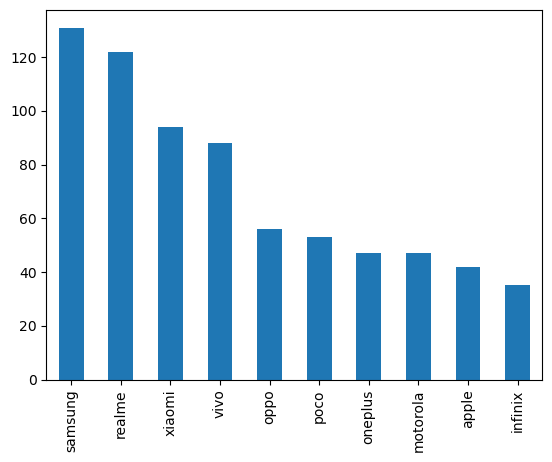

In [7]:
anum['brand_name'].value_counts().head(10).plot(kind='bar')
#phones belonging to samsung featured most number of times

<AxesSubplot:ylabel='brand_name'>

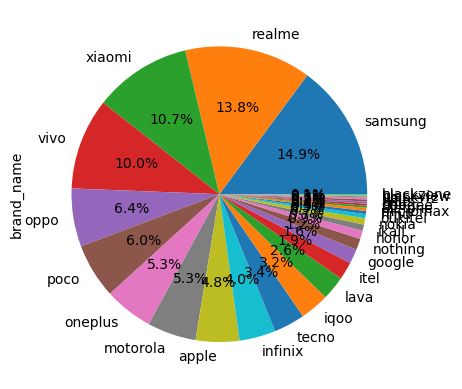

In [8]:
anum['brand_name'].value_counts().plot(kind='pie',autopct="%0.1f%%")


Samsung phones featured the most on the smartprix website which shows that it has got a huge market. realme+samsung+xiaomi+vivo alone makes 47% of the products in the market....oppo is the next with 6.4% of the products.....apple has barely 4.8% of the products in the market and motorola has 5.3% of the products....Out of 30 products available in the data 5 products alone make up 53% of the phones in the market(Note: feature phones had already been removed)

In [9]:
anum['brand_name'].isnull().sum()

0

In [10]:
anum['cost'].describe()
#this data is revealing 2 things 1 that the data is not normally distributed and 2nd that it should be baised on the right side
#Lets see the data

count       881.000000
mean      28206.886493
std       28793.186821
min        1860.000000
25%       11499.000000
50%       19490.000000
75%       29999.000000
max      200999.000000
Name: cost, dtype: float64

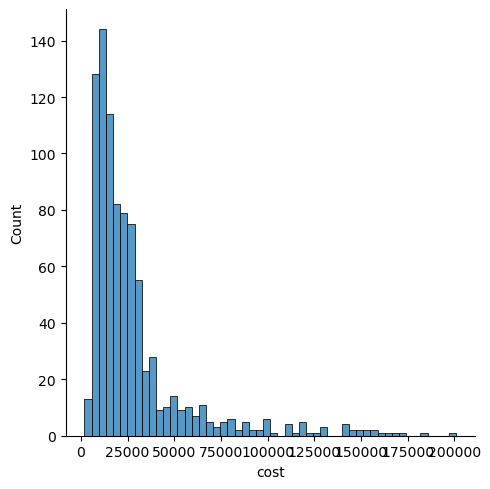

In [11]:
import seaborn as sns 
sns.displot(kind='hist',data=anum,x='cost')

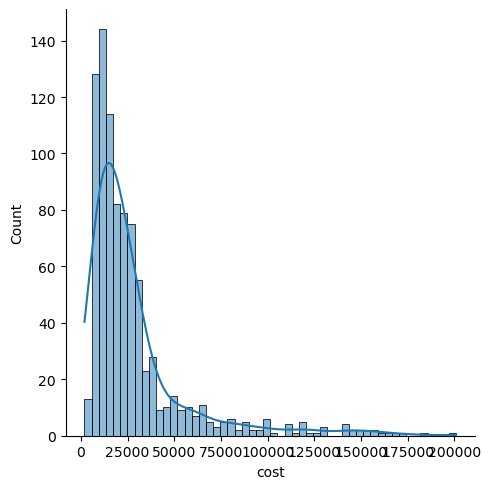

In [12]:
import seaborn as sns
sns.displot(kind='hist',data=anum,x='cost',kde=True)

In [13]:
anum['cost'].skew()
#as we can see that the graph is rightly skewed with a lot of outliers on the positive side

2.77372189049016

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cost'>

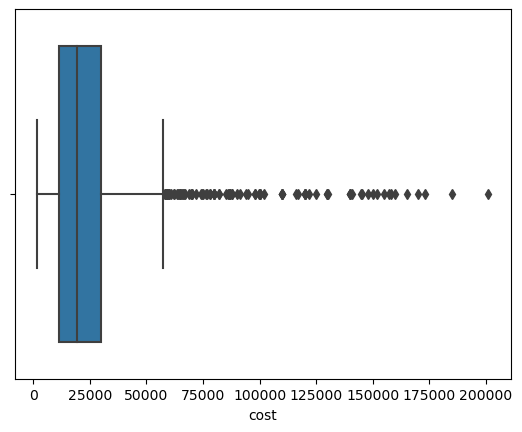

In [14]:
import seaborn as sns
sns.boxplot(anum['cost'])

In [15]:
anum['cost'].describe()

count       881.000000
mean      28206.886493
std       28793.186821
min        1860.000000
25%       11499.000000
50%       19490.000000
75%       29999.000000
max      200999.000000
Name: cost, dtype: float64

In [16]:
import numpy as np 
q1=np.percentile(anum['cost'],25)
q2=np.percentile(anum['cost'],75)
print(q1,q2)

11499.0 29999.0


We learn 2 things from this data first that it has a lot of outliers on positive side meaning there are a number of costly phones, secondly 50% of the phones cost below 19490 and 25% to 75% of them cost between between 11499 and 29999...75% of the phones available are below 29999. 

In [4]:
anda1=anum[anum['cost']>100000]

In [18]:
anda1

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front
53,apple,Apple iPhone 16 Pro Max,144900,90,True,True,False,bionic,6.0,4.00,8.0,256.0,4685,NaN,0,6.90,1320 x 2868,120,3,1.0,ios,NaN,0,48.0,12.0
110,apple,Apple iPhone 16 Pro,119900,89,True,True,False,bionic,6.0,4.00,8.0,128.0,3582,NaN,0,6.30,1206 x 2622,120,3,1.0,ios,NaN,0,48.0,12.0
126,apple,Apple iPhone 15 Pro Max,119900,89,True,True,False,bionic,6.0,3.00,8.0,256.0,4441,NaN,0,6.70,1290 x 2796,120,3,1.0,ios,NaN,0,48.0,12.0
144,samsung,Samsung Galaxy Z Fold 6,144999,92,True,True,False,snapdragon,8.0,3.00,12.0,256.0,4400,25.0,1,7.60,1856 x 2160,120,3,2.0,android,NaN,0,50.0,10.0
200,samsung,Samsung Galaxy S24 Ultra (12GB RAM + 1TB),151999,96,True,True,False,snapdragon,8.0,3.00,12.0,1000.0,5000,45.0,1,6.80,1440 x 3120,120,4,1.0,android,NaN,0,200.0,12.0
203,google,Google Pixel 9 Pro,109999,92,True,True,False,tensor,8.0,3.00,16.0,256.0,4700,27.0,1,6.30,1280 x 2856,120,3,1.0,android,NaN,0,50.0,42.0
221,samsung,Samsung Galaxy S24 Ultra (12GB RAM + 512GB),116999,95,True,True,False,snapdragon,8.0,3.00,12.0,512.0,5000,45.0,1,6.80,1440 x 3120,120,4,1.0,android,NaN,0,200.0,12.0
243,apple,Apple iPhone 16 Pro Max (1TB),184900,91,True,True,False,bionic,6.0,4.00,8.0,1000.0,4685,NaN,0,6.90,1320 x 2868,120,3,1.0,ios,NaN,0,48.0,12.0
269,vivo,Vivo X Fold 3 Pro,159999,98,True,True,True,snapdragon,8.0,3.00,16.0,512.0,5700,100.0,1,8.03,2200 x 2480,120,3,2.0,other,NaN,0,64.0,32.0
280,google,Google Pixel 9 Pro XL,124999,93,True,True,False,tensor,8.0,3.00,16.0,256.0,5060,37.0,1,6.80,1344 x 2992,120,3,1.0,android,NaN,0,50.0,42.0


In [19]:
anda1['spec_score'].describe()

count    34.000000
mean     90.294118
std       4.840044
min      76.000000
25%      89.000000
50%      91.000000
75%      93.000000
max      98.000000
Name: spec_score, dtype: float64

In [20]:
len(anum[anum['cost']<100000])

847

In [21]:
len(anda1)

34

In [5]:
anda2=anum[anum['cost']<100000]

In [23]:
anum['spec_score'].describe()

count    881.000000
mean      79.946652
std       10.032362
min       15.000000
25%       76.000000
50%       82.000000
75%       86.000000
max       98.000000
Name: spec_score, dtype: float64

In [24]:
anda2['spec_score'].describe()

count    847.000000
mean      79.531287
std        9.965124
min       15.000000
25%       75.000000
50%       82.000000
75%       85.000000
max       97.000000
Name: spec_score, dtype: float64

In [25]:
anda1['spec_score'].describe()

count    34.000000
mean     90.294118
std       4.840044
min      76.000000
25%      89.000000
50%      91.000000
75%      93.000000
max      98.000000
Name: spec_score, dtype: float64

The median spec score of of the phone that cost above 1 lakh is 91 while the spec score of rest of the phones is 82.All the costly phones above 1 lakh belong to 5 companies namely apple, samsung, google, vivo and oneplus.  


(a) 50% of the costly phones belong to apple, 32.4% of the costly phones belong to samsung whereas 50% of the less costly phones belong to vivo,xiaomi,samsung and realme....ironically most phones above 1 lakh in the in the market are non-chinese phones as u can see almost 94% of the products above 1 lakh is non-chinese.

(b) All the costly phones have 5g and have nfc but barely ir_blaster, only chinese phones have irblaster both among cheap phones and costly phones.The cost of the phone is not dependent on whether the phone has irblaster or not.

(c)All the processor brands of the costly phones are manufactured by non-chinese comapnies( based in south korea, US, taiwan), even phones that are less than 1 lakh mostly have their processors made in non-chinese companies(90% of them approx).

(d)90% of the num_core in both both the cheap and costly phones are 6 core or 8 core.

(e)Processor speed in most of the costly phones above 1 lakh is slightly higher(90% of them have 3 and 4 GHZ) and the less costly phones have speed between 2 and 3 GHZ(90% of them with 73% belonging to 2GHZ and 18% to 3GHZ)

(f)So 50% of the phones above 1 lakh have a ram_capacity of 12 or 16 GB and the rest 50% have a ram capacity between 8 or 6 GB
Also the costly phones have a IQR between 8 to 12 GB with absolutely no outliers while the phones whicb cost less than 1 lakh
have IQR between 6 to 8 GB but with a lot of outliers especially on the right end
2 phones costing less than 1 lakh btw also have ram_capacity(GB) of 18 GB which none of the costly have btw...1 of the phone
is chinese, one is taiwanese, the chinese phone is using processor manufactured in taiwan and the taiwanese one is using the
processor manufactured in california(US). A couple of feature phones have ram_Capacity less than 2 GB as well.

(g)IQR range for costly phones between 256 to 878 GB, for cheap phones is between 128 to 256 with a outlier of 512 GB. Thus even
the internal capacity is offered much more for costly phones above 1 lakh than cheap phones.

(h)Ironically, the IQR of battery capacity for costlier phones is between 3686 and 4778 and iQR for cheaper phones(less than 1 lakh) starts at 5k and ends at it. Thus we conclude that battery capacity barely has any dependence on cost. It doesnot increase as the cost of the phone increases.

(i)The availability/non-availability of fast_charging doesn't decide the cost of the phone meaning the availability of fast charging doesn't increase the cost. Availability of fast charging is not directly proportional to cost. Screen size too is not directly propotional to the cost.

(j)You can clearly see that there is a difference between resolution of costly phones to that of the relatively cheaper phone.The higher the resolution in pixels the costlier the phone. So here is a directly proportional relationship between resolution and cost of the phone.

(h)refresh rate of cheaper phones is between 90 and 120(highest being 165), costlier phone had an iqr of 120 and 3 outliers of 60 on the left. The median(50%) for both the data is the phones are the same although the mean value for the cheaper phones is
lesser. Thus we determine that refresh_rate(Hz) is not strongly proportional to the increase in the cost of the phone.

(j)Almost 50% of the costly phones above 1 lakh use the ios operating system while 94.1% of the cheap phones below 1 lakh use the android operating system.

(k)Ironically, costly phones above 1 lakh donot have any extended memory. So cost is not directly proportional to the existence of extended memory.

(l)There is not much of a difference between primary_camera_rear in terms of pixels for both costly phones and cheaper phones, both have almost the same IQR and median although mean of costly phones is a bit more( perhaps some huge outliers on the +ve side)

(m)There is not much of a difference between megapixels of the primary_camera_front as far as cheap phones and costly phones are
concerned and infact the median in case of cheaper phones for megapixels of primary_camera_front is more than median of 
megapixels of primary_camera_front for costlier phones and even the mean and max value of the cheaper phones is higher.

<AxesSubplot:ylabel='brand_name'>

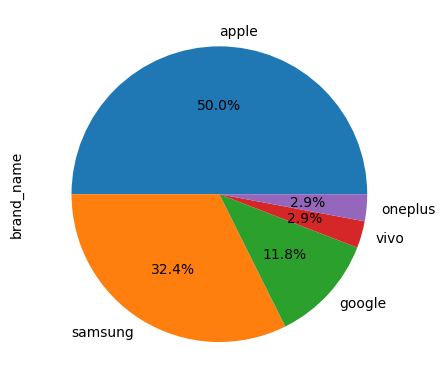

In [26]:
anda1['brand_name'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<AxesSubplot:ylabel='brand_name'>

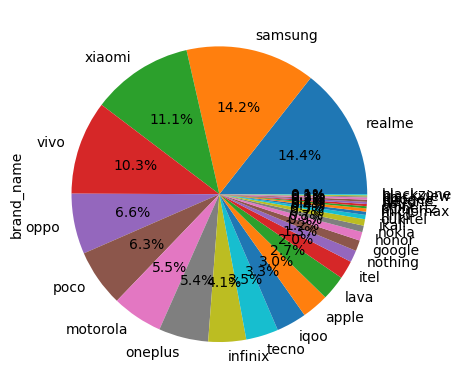

In [27]:
anda2['brand_name'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [28]:
#anda1 of mehenga phones, anda2 of sasta phones.
anda1['brand_name'].value_counts()

apple      17
samsung    11
google      4
vivo        1
oneplus     1
Name: brand_name, dtype: int64

In [29]:
anda2['brand_name'].value_counts()

realme       122
samsung      120
xiaomi        94
vivo          87
oppo          56
poco          53
motorola      47
oneplus       46
infinix       35
tecno         30
iqoo          28
apple         25
lava          23
itel          17
nothing       11
google        10
honor          8
nokia          6
ikall          6
oukitel        4
hmd            3
micromax       3
unihertz       2
cmf            2
asus           2
ulefone        2
doogee         2
jio            1
blackview      1
blackzone      1
Name: brand_name, dtype: int64

In [30]:
#anda1 of mehengaphones, anda2 of sasta phones.
anda1['has_5g'].value_counts()

True    34
Name: has_5g, dtype: int64

In [31]:
anda2['has_5g'].value_counts()

True     614
False    233
Name: has_5g, dtype: int64

In [32]:
anda2['has_nfc'].value_counts()

False    537
True     310
Name: has_nfc, dtype: int64

In [33]:
anda1['has_nfc'].value_counts()

True    34
Name: has_nfc, dtype: int64

In [34]:
anda2['has_irblaster'].value_counts()

False    662
True     185
Name: has_irblaster, dtype: int64

In [35]:
anda1[anda1['has_irblaster']==True]['brand_name'].value_counts()
#both vivo and oneplus are chinese companies

vivo       1
oneplus    1
Name: brand_name, dtype: int64

<AxesSubplot:title={'center':'phone brand of costly phones(above 1 lakh Rs)'}, ylabel='brand_name'>

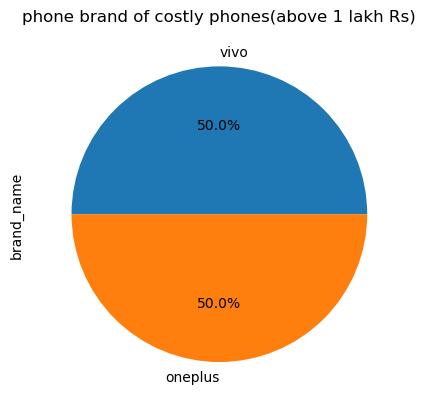

In [39]:
anda1[anda1['has_irblaster']==True]['brand_name'].value_counts().plot(kind='pie',autopct="%0.1f%%",title='phone brand of costly phones(above 1 lakh Rs)')

In [36]:
anda2[anda2['has_irblaster']==True]['brand_name'].value_counts()
#xiaomi is a chinese brand, poco to belongs to xiaomi and is a chinese company, oneplus too chinese, oppo is chinese, 
#infinix=chinese, realme-chinese, iqoo-chinese, unihertz=chinese, honor=chinese, vivo=chinese, ulefone=chinese 
#explode=[0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.2]

xiaomi      70
poco        40
oneplus     17
tecno       13
oppo        12
infinix     11
realme       9
iqoo         7
unihertz     2
honor        2
vivo         1
ulefone      1
Name: brand_name, dtype: int64

<AxesSubplot:title={'center':'Brand of cheap phones with ir blaster(costing below Rs 1 lakh)'}, ylabel='brand_name'>

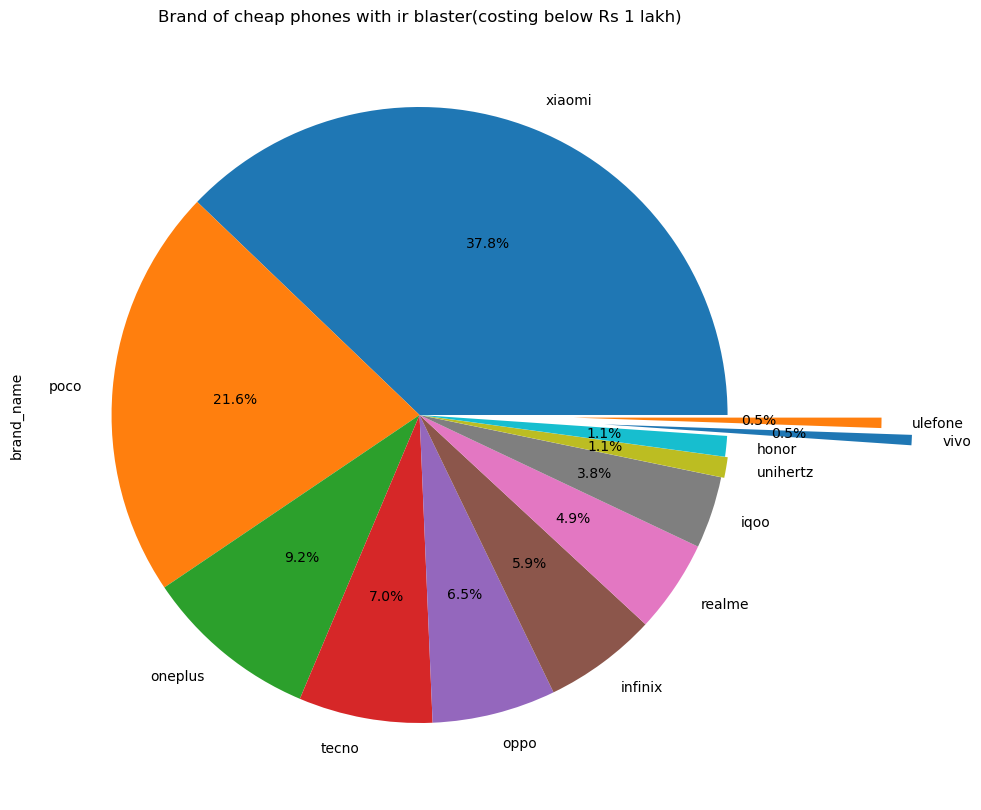

In [40]:
explode=[0,0,0,0,0,0,0,0,0.01,0.001,0.6,0.5]
plt.figure(figsize=(10,10))
anda2[anda2['has_irblaster']==True]['brand_name'].value_counts().plot(kind='pie',autopct="%0.1f%%",title='Brand of cheap phones with ir blaster(costing below Rs 1 lakh)',explode=explode)

All phones with ir blaster r chinese

In [37]:
anda1['has_irblaster'].value_counts()
#out of the 2 oneplus has been manufactured in china

False    32
True      2
Name: has_irblaster, dtype: int64

In [38]:
anda1[anda1['has_irblaster']==True]

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front
269,vivo,Vivo X Fold 3 Pro,159999,98,True,True,True,snapdragon,8.0,3.0,16.0,512.0,5700,100.0,1,8.03,2200 x 2480,120,3,2.0,other,NaN,0,64.0,32.0
470,oneplus,OnePlus Open 5G Apex Edition,148000,96,True,True,True,snapdragon,8.0,3.0,16.0,1000.0,4805,67.0,1,7.82,2268 x 2440,120,3,2.0,other,NaN,0,64.0,32.0


In [39]:
anda1['processor_brand'].value_counts()

bionic        15
snapdragon    12
tensor         4
apple          2
exynos         1
Name: processor_brand, dtype: int64

<AxesSubplot:ylabel='processor_brand'>

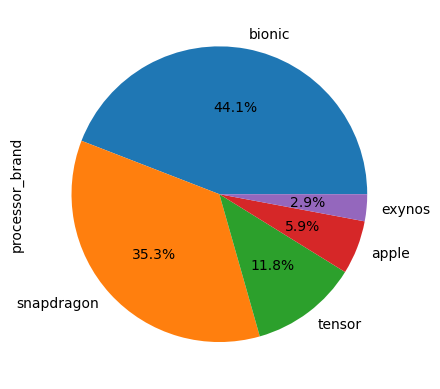

In [40]:
anda1['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%")
#bionic is in california, snapdragon belongs to USA too, tensor chip has been made by US too and so is the apple processor too is
#made in US, exynos processor has plants in south korea and US

In [79]:
anda2['processor_brand'].value_counts()
explode=[0,0,0,0,0,0,0.5,1.2,1.8,1.5,2.6,2.7,3.1,3.4,2.1,0.26]

<AxesSubplot:ylabel='processor_brand'>

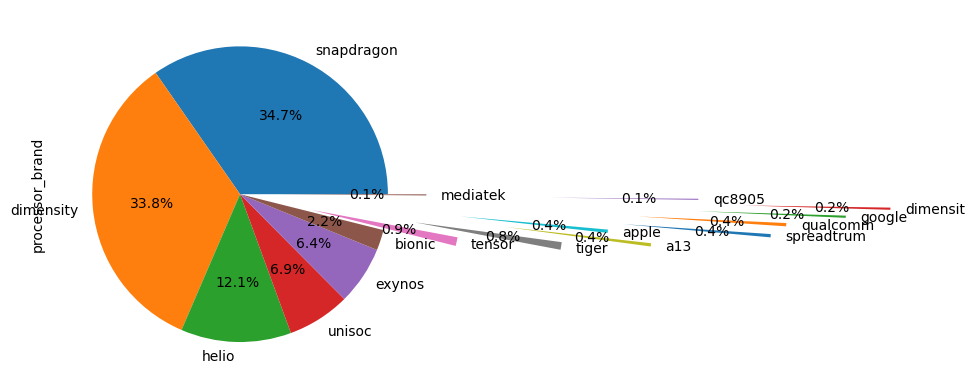

In [80]:

anda2['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%",explode=explode)
#dimensity processor company is headquartered in taiwan, snapdragon processor making company is headquartered in california, 
#helio is headquartered in taiwan, unisoc processor is headquartered in china, exynos processor is based in south korea
#So basically most of the processors amongst the phones less costly than rs 1 lakh too are manufactured outside china

In [43]:
#anda1 of mehengaphones, anda2 of sasta phones.
anda1['num_cores'].value_counts()

6.0     17
8.0     16
10.0     1
Name: num_cores, dtype: int64

<AxesSubplot:title={'center':'Number of cores used by phones costing more than 1 lakh'}, ylabel='num_cores'>

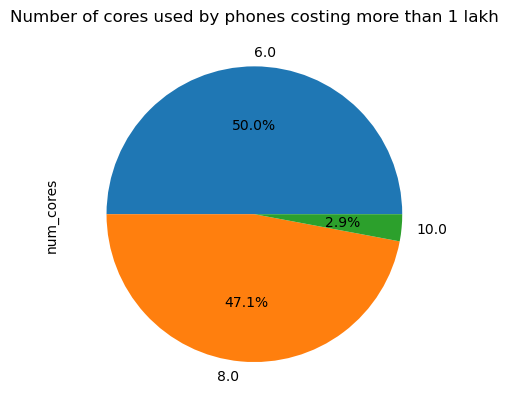

In [82]:
anda1['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%",title='Number of cores used by phones costing more than 1 lakh')

In [44]:
anda2['num_cores'].value_counts()


8.0     794
6.0      25
1.0       8
4.0       7
10.0      6
9.0       6
2.0       1
Name: num_cores, dtype: int64

<AxesSubplot:title={'center':'Number of cores used by phones costing less than Rs 1 lakh'}, ylabel='num_cores'>

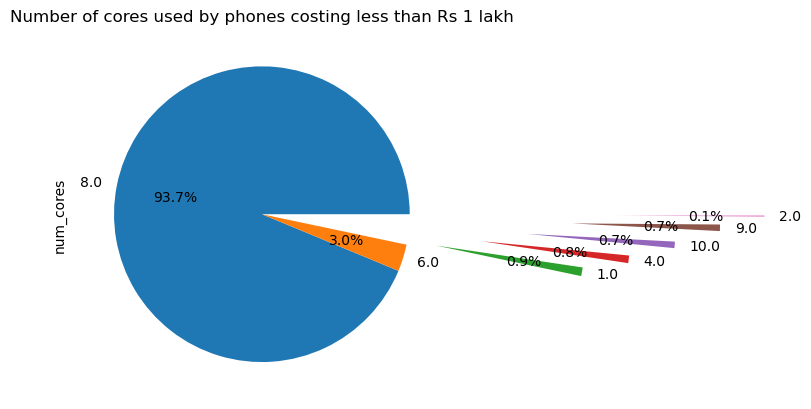

In [85]:
explode=[0,0,1.2,1.5,1.8,2.1,2.4]
anda2['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%",explode=explode,title="Number of cores used by phones costing less than Rs 1 lakh")

In [45]:
anda1['processor_speed(GHz)'].value_counts()

3.00    25
4.00     7
3.70     1
4.04     1
Name: processor_speed(GHz), dtype: int64

<AxesSubplot:title={'center':'Processor speed of costly phones above 1 lakh'}, ylabel='processor_speed(GHz)'>

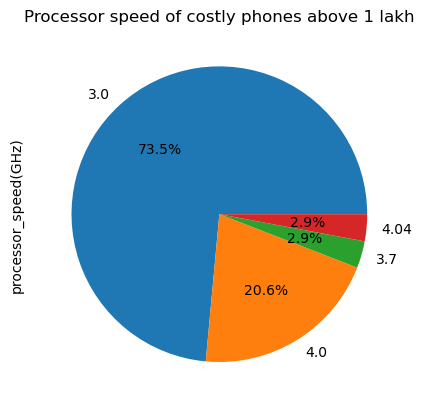

In [96]:
anda1['processor_speed(GHz)'].value_counts().plot(kind='pie',autopct="%0.1f%%",title='Processor speed of costly phones above 1 lakh')

In [47]:
anda2['processor_speed(GHz)'].value_counts()

2.000    619
3.000    151
1.000     57
1.800      7
4.000      4
2.400      3
0.208      2
1.050      1
4.050      1
1.300      1
4.040      1
Name: processor_speed(GHz), dtype: int64

<AxesSubplot:title={'center':'Processor speed of phones which cost less than 1 lakh'}, ylabel='processor_speed(GHz)'>

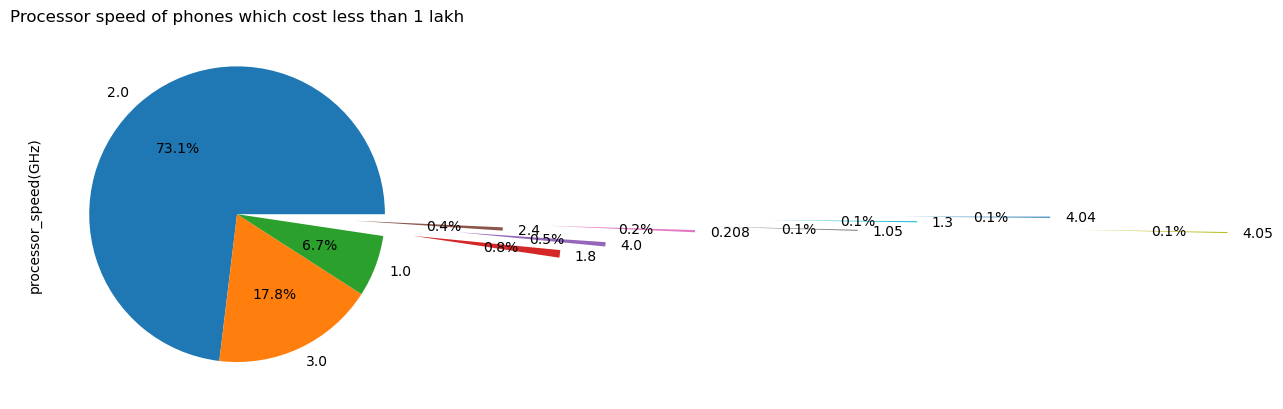

In [95]:
explode=[0,0,0,1.2,1.5,0.8,2.1,3.2,5.7,3.6,4.5]
anda2['processor_speed(GHz)'].value_counts().plot(kind='pie',autopct="%0.1f%%",explode=explode,title="Processor speed of phones which cost less than 1 lakh")

In [49]:
anum['brand_name'].value_counts()
#xiaomi is a chinese brand, poco to belongs to xiaomi and is a chinese company, oneplus too chinese, oppo is chinese, 
#infinix=chinese, realme-chinese, iqoo-chinese, unihertz=chinese, honor=chinese, vivo=chinese, ulefone=chinese
#samsung=south-korea, realme-chinnese, oneplus-chinese, mototola-american,apple-american,tecno-china,iqoo-chinese,lava-india,
#itel-chinese,google-american,nothing-british,honor-chinese,ikall-india, nokia-finland,

samsung      131
realme       122
xiaomi        94
vivo          88
oppo          56
poco          53
oneplus       47
motorola      47
apple         42
infinix       35
tecno         30
iqoo          28
lava          23
itel          17
google        14
nothing       11
honor          8
ikall          6
nokia          6
oukitel        4
hmd            3
micromax       3
ulefone        2
doogee         2
cmf            2
asus           2
unihertz       2
jio            1
blackview      1
blackzone      1
Name: brand_name, dtype: int64

In [50]:
anda1['processor_speed(GHz)'].value_counts()

3.00    25
4.00     7
3.70     1
4.04     1
Name: processor_speed(GHz), dtype: int64

In [51]:
anda2['processor_speed(GHz)'].value_counts()

2.000    619
3.000    151
1.000     57
1.800      7
4.000      4
2.400      3
0.208      2
1.050      1
4.050      1
1.300      1
4.040      1
Name: processor_speed(GHz), dtype: int64

In [52]:
anda1['ram_capacity(GB)'].value_counts()

8.0     13
12.0    11
16.0     6
6.0      3
Name: ram_capacity(GB), dtype: int64

<AxesSubplot:title={'center':'Ram capacity of the costly phones'}, ylabel='ram_capacity(GB)'>

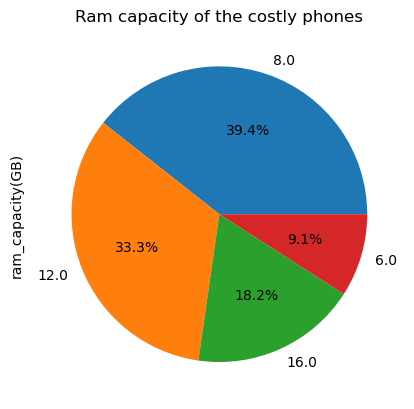

In [97]:
anda1['ram_capacity(GB)'].value_counts().plot(kind='pie',autopct="%0.1f%%",title="Ram capacity of the costly phones")
#So 50% of the phones above 1 lakh have a ram_capacity of 12 or 16 GB and the rest 50% have a ram capacity between 8 or 6 GB
#Also the costly phones have a IQR between 8 to 12 GB with absolutely no outliers while the phones whicb cost less than 1 lakh
#have IQR between 6 to 8 GB but with a lot of outliers especially on the right end
# 2 phones costing less than 1 lakh btw also have ram_capacity(GB) of 18 GB which none of the costly have btw...1 of the phone
#is chinese, one is taiwanese, the chinese phone is using processor manufactured in taiwan and the taiwanese one is using the
#processor manufactured in california(US). A couple of feature phones have ram_Capacity less than 2 GB as well.

In [54]:
anda1['ram_capacity(GB)'].describe()

count    33.000000
mean     10.606061
std       3.297152
min       6.000000
25%       8.000000
50%      12.000000
75%      12.000000
max      16.000000
Name: ram_capacity(GB), dtype: float64

<AxesSubplot:xlabel='ram_capacity(GB)'>

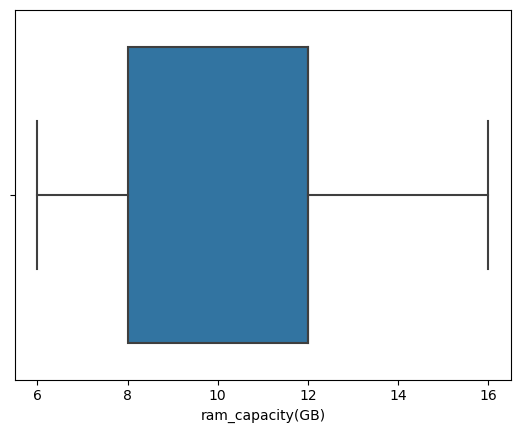

In [55]:
import seaborn as sns 
sns.boxplot(data=anda1, x='ram_capacity(GB)')

In [56]:
anda2['ram_capacity(GB)'].describe()

count    846.000000
mean       7.342591
std        2.963354
min        0.008000
25%        6.000000
50%        8.000000
75%        8.000000
max       18.000000
Name: ram_capacity(GB), dtype: float64

In [57]:
anda2['ram_capacity(GB)'].value_counts()

8.000     347
4.000     171
6.000     149
12.000    127
3.000      19
16.000     14
2.000       8
0.064       3
18.000      2
0.008       2
0.032       2
0.512       1
0.048       1
Name: ram_capacity(GB), dtype: int64

<AxesSubplot:xlabel='ram_capacity(GB)'>

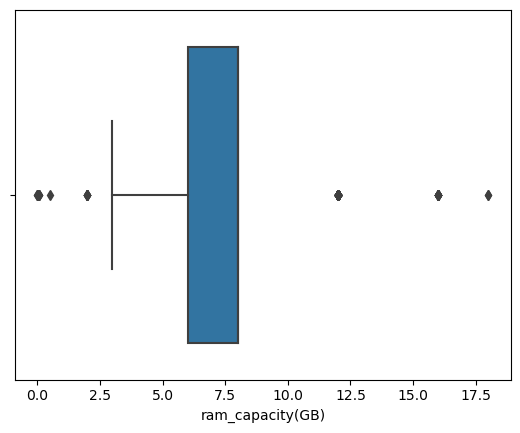

In [58]:
import seaborn as sns 
sns.boxplot(data=anda2,x='ram_capacity(GB)')

In [59]:
anda2[anda2['ram_capacity(GB)']>11]['brand_name'].value_counts()
#143 above 11 GB

realme       20
oneplus      16
xiaomi       13
oppo         12
samsung      12
vivo         11
motorola     10
poco          9
iqoo          7
infinix       7
nothing       5
google        4
honor         4
tecno         4
unihertz      2
asus          2
ulefone       2
hmd           1
doogee        1
blackview     1
Name: brand_name, dtype: int64

In [60]:
anda2[anda2['ram_capacity(GB)']==18]
#2 phones costing less than 1 lakh btw also have ram_capacity(GB) of 18 GB which none of the costly have btw...1 of the phone
#is chinese, one is taiwanese, the chinese phone is using processor manufactured in taiwan and the taiwanese one is using the
#processor manufactured in california(US).

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front
165,unihertz,Unihertz Tank 3 Pro 5G,91500,97,True,True,True,dimensity,8.0,3.0,18.0,512.0,23800,120.0,1,6.79,1080 x 2460,120,4,1.0,android,NaN,0,200.0,50.0
802,asus,Asus ROG Phone 5s Pro 5G,79999,89,True,True,False,snapdragon,8.0,2.0,18.0,512.0,6000,65.0,1,6.78,1080 x 2448,144,3,1.0,android,NaN,0,64.0,24.0


In [61]:
anda2[anda2['ram_capacity(GB)']<2]

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front
464,jio,Jio JioPhone,2999,30,False,False,False,qc8905,2.0,1.000,0.512,4.000,2000,NaN,0,2.40,240 x 320,60,1,1.0,other,128.0,1,2.0,0.3
502,itel,Itel MagicX Pro,2290,22,False,False,False,unisoc,1.0,1.000,0.064,0.128,2500,NaN,0,2.40,320 x 240,60,1,NaN,other,64.0,1,0.3,0.0
678,nokia,Nokia 225 4G,2799,18,False,False,False,unisoc,1.0,1.000,0.064,0.128,1150,NaN,0,2.40,240 x 320,60,1,NaN,other,32.0,1,0.3,0.0
679,nokia,Nokia 215 4G,2399,18,False,False,False,unisoc,1.0,1.000,0.064,0.128,1150,NaN,0,2.40,240 x 320,60,0,NaN,other,32.0,1,0.0,0.0
706,nokia,Nokia 6310 (2024),3499,16,False,False,False,unisoc,1.0,0.208,0.008,0.016,1450,NaN,0,2.80,240 x 320,60,1,NaN,other,32.0,1,0.3,0.0
804,nokia,Nokia 6310 2021,3299,16,False,False,False,unisoc,1.0,0.208,0.008,0.016,1150,NaN,0,2.80,160 x 240,60,1,NaN,other,32.0,1,0.3,0.0
869,ikall,iKall A2,1880,16,False,False,False,spreadtrum,4.0,1.000,0.032,0.032,2000,NaN,0,2.80,280 x 320,60,1,NaN,other,64.0,1,0.3,0.0
870,ikall,iKall A4,1860,15,False,False,False,NaN,1.0,1.000,0.032,0.032,2000,NaN,0,3.36,280 x 320,60,1,NaN,other,64.0,1,0.3,0.0
874,blackzone,BlackZone Taurus 4G,1959,22,False,False,False,NaN,1.0,1.000,0.048,0.048,3000,NaN,0,2.40,480 x 640,60,1,NaN,other,48.0,1,2.0,0.0


In [98]:
anda2['ram_capacity(GB)'].value_counts()

8.000     347
4.000     171
6.000     149
12.000    127
3.000      19
16.000     14
2.000       8
0.064       3
18.000      2
0.008       2
0.032       2
0.512       1
0.048       1
Name: ram_capacity(GB), dtype: int64

<AxesSubplot:title={'center':'Ram capacity distribution of cheaper phones costing below 1 lakh'}, ylabel='ram_capacity(GB)'>

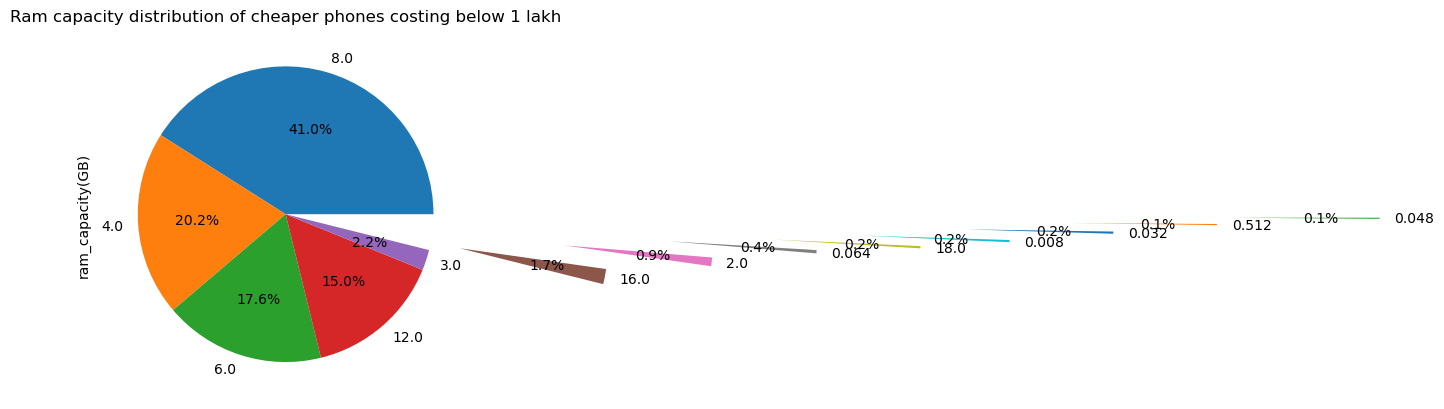

In [101]:
explode=[0,0,0,0,0,1.2,1.9,2.6,3.3,3.9,4.6,5.3,6.4]
anda2['ram_capacity(GB)'].value_counts().plot(kind='pie',autopct="%0.1f%%",explode=explode,title='Ram capacity distribution of cheaper phones costing below 1 lakh')

In [63]:
anda1['internal_capacity(GB)'].value_counts()

512.0     14
1000.0     9
256.0      8
128.0      3
Name: internal_capacity(GB), dtype: int64

<AxesSubplot:ylabel='internal_capacity(GB)'>

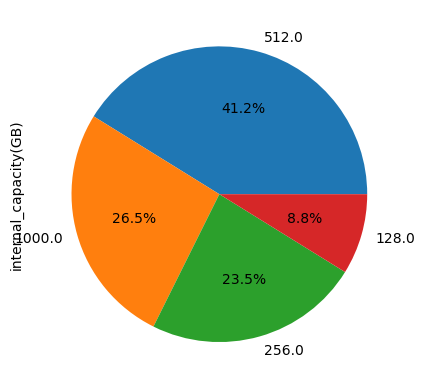

In [64]:
anda1['internal_capacity(GB)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [65]:
anda1['internal_capacity(GB)'].describe()

count      34.000000
mean      547.058824
std       304.917370
min       128.000000
25%       256.000000
50%       512.000000
75%       878.000000
max      1000.000000
Name: internal_capacity(GB), dtype: float64

<AxesSubplot:xlabel='internal_capacity(GB)'>

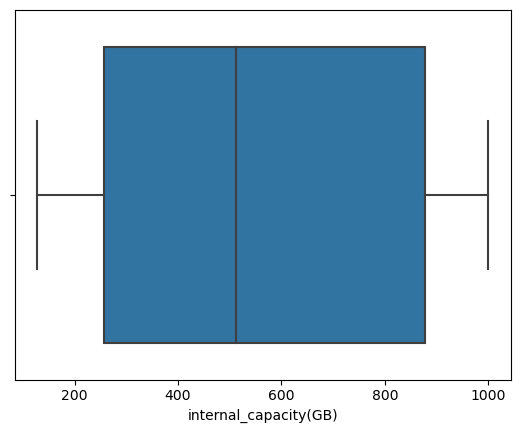

In [104]:
import seaborn as sns 
sns.boxplot(data=anda1,x='internal_capacity(GB)')
#IQR range for costly phones between 256 to 878 GB, for cheap phones is between 128 to 256 with a outlier of 512 GB. Thus even
#the internal capacity is offered much more for costly phones above 1 lakh than cheap phones.

<AxesSubplot:xlabel='internal_capacity(GB)'>

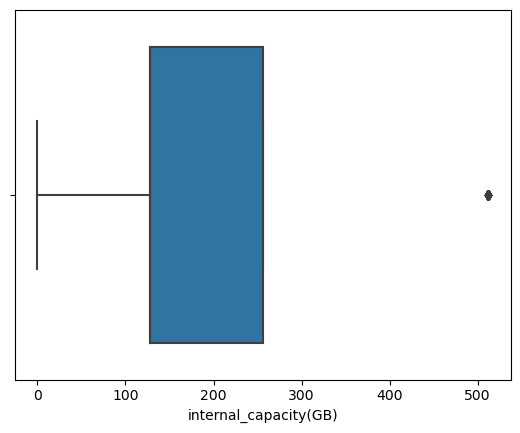

In [67]:
sns.boxplot(data=anda2,x='internal_capacity(GB)')

In [68]:
anda2[anda2['internal_capacity(GB)']>256]['internal_capacity(GB)'].value_counts()

512.0    46
Name: internal_capacity(GB), dtype: int64

In [69]:
anda2['internal_capacity(GB)'].describe()

count    847.000000
mean     173.492949
std      108.179403
min        0.016000
25%      128.000000
50%      128.000000
75%      256.000000
max      512.000000
Name: internal_capacity(GB), dtype: float64

In [70]:
anda2['internal_capacity(GB)'].value_counts()

128.000    405
256.000    247
64.000     121
512.000     46
32.000      17
0.128        3
16.000       2
0.016        2
0.032        2
4.000        1
0.048        1
Name: internal_capacity(GB), dtype: int64

<AxesSubplot:ylabel='internal_capacity(GB)'>

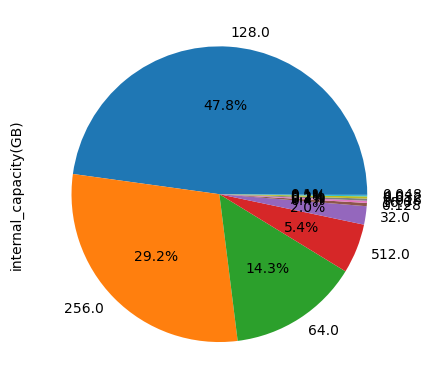

In [71]:
anda2['internal_capacity(GB)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [72]:
anda1['battery_capacity(mAh)'].value_counts()

4400    5
5000    4
3582    4
4685    3
4441    3
5060    2
3274    2
5700    1
3200    1
4700    1
4805    1
4650    1
4900    1
4352    1
3561    1
4674    1
4000    1
2815    1
Name: battery_capacity(mAh), dtype: int64

In [73]:
anda1['battery_capacity(mAh)'].describe()

count      34.000000
mean     4345.029412
std       670.130629
min      2815.000000
25%      3686.500000
50%      4441.000000
75%      4778.750000
max      5700.000000
Name: battery_capacity(mAh), dtype: float64

In [74]:
anda2['battery_capacity(mAh)'].describe()

count      847.000000
mean      4991.742621
std       1246.098034
min       1150.000000
25%       5000.000000
50%       5000.000000
75%       5000.000000
max      23800.000000
Name: battery_capacity(mAh), dtype: float64

In [75]:
anda2['battery_capacity(mAh)'].value_counts()

5000     481
4500      55
6000      53
5500      37
4000      22
4600      17
5100      15
4700      15
5200      12
5160      10
4300       7
4400       5
3700       5
4800       5
5030       4
3000       4
3349       3
4325       3
3800       3
1150       3
5020       3
4520       3
2000       3
4200       3
5800       3
3240       3
4383       3
4230       2
4020       2
10600      2
11000      2
4350       2
5400       2
5630       2
4450       2
4980       2
3561       2
4830       2
23800      2
4575       2
4674       2
5050       2
3900       2
3279       2
3110       2
4310       2
4492       2
2815       2
1450       1
6500       1
3500       1
10800      1
5150       1
4820       1
3120       1
2691       1
4900       1
4610       1
4030       1
4250       1
15600      1
3300       1
4050       1
5080       1
3687       1
2500       1
4805       1
4720       1
5910       1
4355       1
5600       1
4385       1
8800       1
Name: battery_capacity(mAh), dtype: int64

In [76]:
anda1['fast_charging(W)'].value_counts()

25.0     6
45.0     5
37.0     2
27.0     1
100.0    1
67.0     1
20.0     1
Name: fast_charging(W), dtype: int64

<AxesSubplot:ylabel='fast_charging(W)'>

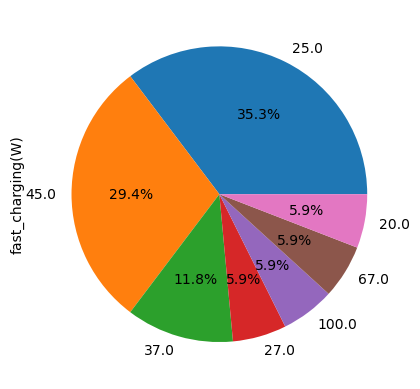

In [77]:
anda1['fast_charging(W)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [78]:
anda2['fast_charging(W)'].value_counts()

33.0     118
18.0     105
25.0      84
45.0      74
80.0      60
67.0      53
15.0      46
44.0      39
10.0      37
120.0     36
100.0     22
65.0      19
66.0      15
30.0      15
68.0      14
20.0      11
90.0       6
70.0       5
50.0       4
27.0       2
125.0      2
35.0       2
150.0      2
5.0        1
60.0       1
Name: fast_charging(W), dtype: int64

<AxesSubplot:ylabel='fast_charging(W)'>

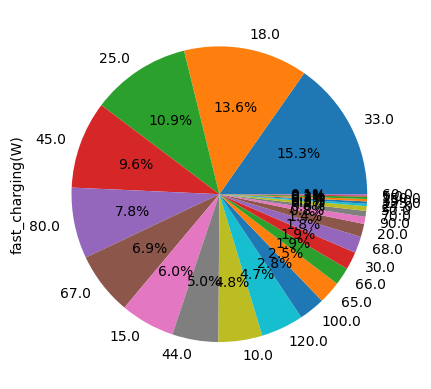

In [79]:
anda2['fast_charging(W)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [80]:
anda1['fast_charging_available'].value_counts()
#The availability/non-availability of fast_charging doesn't decide the cost of the phone meaning the availability of fast charging
#doesn't increase the cost. Availability of fast charging is not directly proportional to cost. Screen size too is not directly
#propotional to the cost.
#You can clearly see that there is a difference between resolution of costly phones to that of the relatively cheaper phone.The
#higher the resolution in pixels the costlier the phone. So here is a directly proportional relationship between resolution and
#cost of the phone.

0    17
1    17
Name: fast_charging_available, dtype: int64

<AxesSubplot:ylabel='fast_charging_available'>

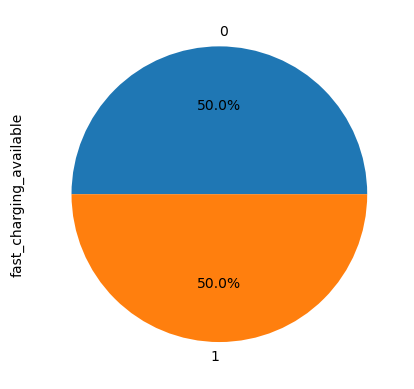

In [6]:
anda1['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [81]:
anda1[anda1['fast_charging_available']==0]['brand_name'].value_counts()

apple     16
google     1
Name: brand_name, dtype: int64

In [82]:
anda1[anda1['fast_charging_available']==1]['brand_name'].value_counts()

samsung    11
google      3
vivo        1
oneplus     1
apple       1
Name: brand_name, dtype: int64

In [83]:
anda2['fast_charging_available'].value_counts()

1    773
0     74
Name: fast_charging_available, dtype: int64

<AxesSubplot:ylabel='fast_charging_available'>

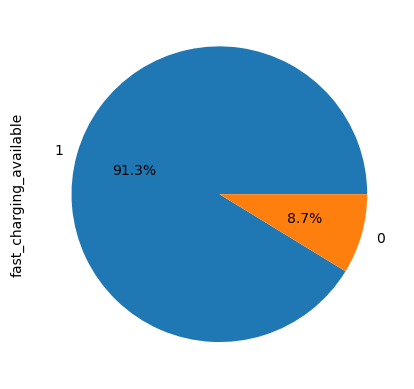

In [7]:
anda2['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [84]:
anda1['screen_size(inches)'].value_counts()

6.70    7
6.80    6
6.30    5
7.60    5
6.10    5
6.90    3
8.03    2
7.82    1
Name: screen_size(inches), dtype: int64

<AxesSubplot:ylabel='screen_size(inches)'>

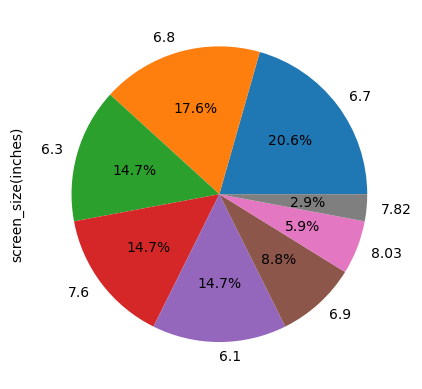

In [85]:
anda1['screen_size(inches)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [86]:
anda2['screen_size(inches)'].value_counts()

6.67    141
6.70    114
6.78     89
6.60     66
6.50     53
6.56     50
6.74     35
6.72     33
6.43     29
6.55     29
6.40     21
6.10     20
6.79     14
6.77     11
6.80     10
6.71     10
6.58     10
6.53      9
6.90      8
6.20      8
6.30      7
6.52      7
6.51      6
6.45      6
6.44      6
6.62      5
2.80      5
2.40      5
6.75      5
6.59      5
6.38      3
6.73      3
6.82      3
7.60      2
6.18      2
6.88      2
6.22      2
6.64      2
5.00      1
5.50      1
6.41      1
5.30      1
6.95      1
6.36      1
7.82      1
6.08      1
6.47      1
6.85      1
3.36      1
Name: screen_size(inches), dtype: int64

<AxesSubplot:ylabel='screen_size(inches)'>

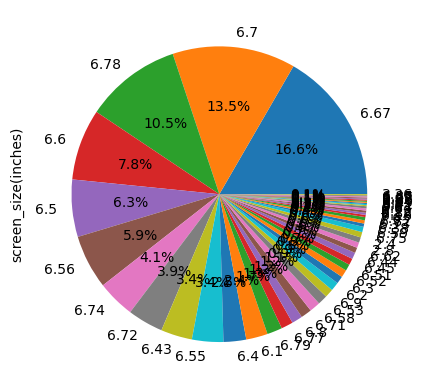

In [87]:
anda2['screen_size(inches)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [88]:
anda1['resolution(px)'].value_counts()

1206 x 2622    4
1290 x 2796    4
1179 x 2556    4
1320 x 2868    3
1856 x 2160    3
1440 x 3120    3
1344 x 2992    2
1440 x 3088    2
1812 x 2176    2
1280 x 2856    1
2200 x 2480    1
2268 x 2440    1
2152 x 2076    1
1284 x 2778    1
1080 x 2640    1
1170 x 2532    1
Name: resolution(px), dtype: int64

<AxesSubplot:title={'center':'Resolution for costlier phones above 1 lakh'}, ylabel='resolution(px)'>

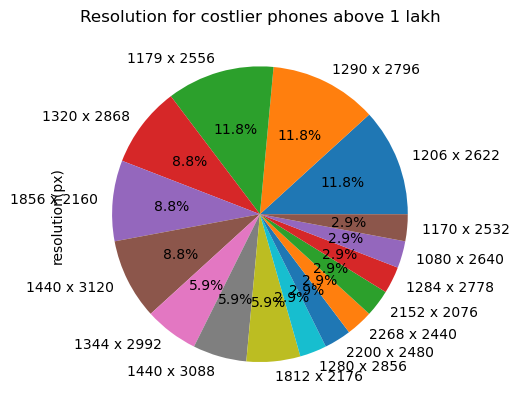

In [8]:
anda1['resolution(px)'].value_counts().plot(kind='pie',autopct="%0.1f%%",title="Resolution for costlier phones above 1 lakh")
#You can clearly see that there is a difference between resolution of costly phones to that of the relatively cheaper phone.The
#higher the resolution in pixels the costlier the phone. So here is a directly proportional relationship between resolution and
#cost of the phone.

<AxesSubplot:title={'center':'Distribution of resolution for the cheaper phones below 1 lakh'}, ylabel='resolution(px)'>

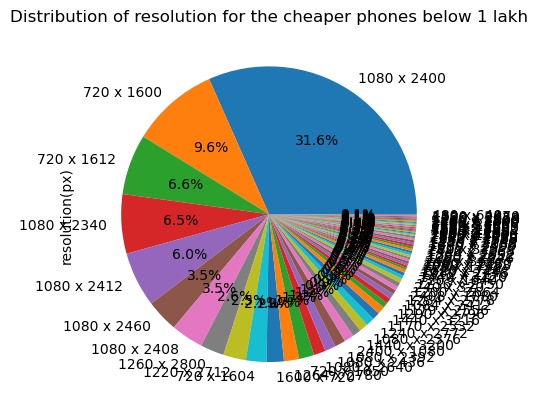

In [9]:
anda2['resolution(px)'].value_counts().plot(kind='pie',autopct="%0.1f%%",title='Distribution of resolution for the cheaper phones below 1 lakh')

In [91]:
anda2['resolution(px)'].value_counts()

1080 x 2400    268
720 x 1600      81
720 x 1612      56
1080 x 2340     55
1080 x 2412     51
1080 x 2460     30
1080 x 2408     30
1260 x 2800     22
1220 x 2712     21
720 x 1604      19
1600 x 720      16
1264 x 2780     14
720 x 1650      14
1080 x 2640     11
1080 x 2436     10
1080 x 2392     10
2400 x 1080      9
1440 x 3200      8
1080 x 2376      8
1240 x 2772      8
1170 x 2532      7
1440 x 3216      7
1290 x 2796      5
1179 x 2556      5
1084 x 2412      5
1284 x 2778      4
2408 x 1080      4
1200 x 2664      4
240 x 320        4
1236 x 2750      3
720 x 1640       3
1440 x 3120      3
1812 x 2176      2
1080 x 2448      2
1520 x 720       2
828 x 1792       2
1080 x 2388      2
1080 x 2280      2
240 x 360        2
1080 x 2246      2
1200 x 2652      2
1344 x 2992      2
1440 x 3168      2
280 x 320        2
1080 x 2406      2
1440 x 3088      2
1256 x 2760      2
1080 x 2520      2
1242 x 2688      1
2340 x 1080      1
720 x 1520       1
1080 x 1920      1
720 x 1280  

In [92]:
anda1['refresh_rate(Hz)'].value_counts()

120    31
60      3
Name: refresh_rate(Hz), dtype: int64

<AxesSubplot:xlabel='refresh_rate(Hz)'>

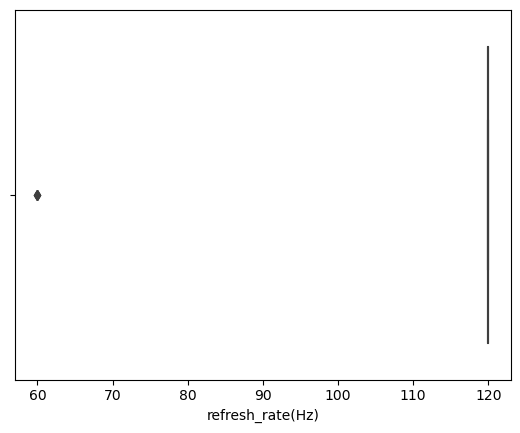

In [93]:
import seaborn as sns 
sns.boxplot(data=anda1,x='refresh_rate(Hz)')

<AxesSubplot:xlabel='refresh_rate(Hz)'>

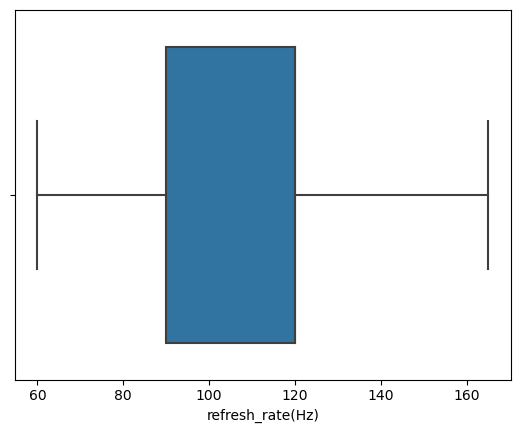

In [94]:
import seaborn as sns 
sns.boxplot(data=anda2,x='refresh_rate(Hz)')
#refresh rate of cheaper phones is between 90 and 120(highest being 165), costlier phone had an iqr of 120 and 3 outliers of 60
#on the left. The median(50%) for both the data is the phones are the same although the mean value for the cheaper phones is
#lesser. Thus we determine that refresh_rate(Hz) is not strongly proportional to the increase in the cost of the phone.

In [95]:
anda1['refresh_rate(Hz)'].describe() 

count     34.000000
mean     114.705882
std       17.274134
min       60.000000
25%      120.000000
50%      120.000000
75%      120.000000
max      120.000000
Name: refresh_rate(Hz), dtype: float64

In [96]:
anda2['refresh_rate(Hz)'].describe()

count    847.000000
mean     103.020071
std       24.443611
min       60.000000
25%       90.000000
50%      120.000000
75%      120.000000
max      165.000000
Name: refresh_rate(Hz), dtype: float64

In [97]:
anda2['refresh_rate(Hz)'].value_counts()

120    455
90     208
60     150
144     32
165      2
Name: refresh_rate(Hz), dtype: int64

In [98]:
anda1['front_camera(MP)'].value_counts()

1.0    26
2.0     8
Name: front_camera(MP), dtype: int64

<AxesSubplot:ylabel='front_camera(MP)'>

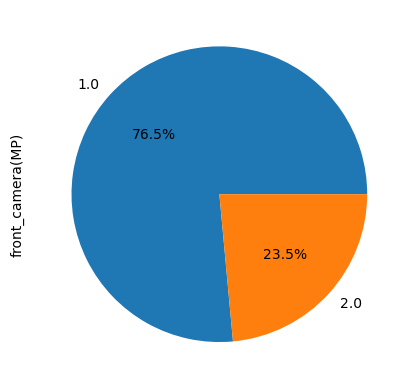

In [99]:
anda1['front_camera(MP)'].value_counts().plot(kind='pie',autopct="%0.1f%%")
#The cheaper phone majorly has 1 front_camera and that is same with respect to the costlier phones too but with the exception 
#that 1/5th of the costly phones have 2 cameras.

<AxesSubplot:ylabel='front_camera(MP)'>

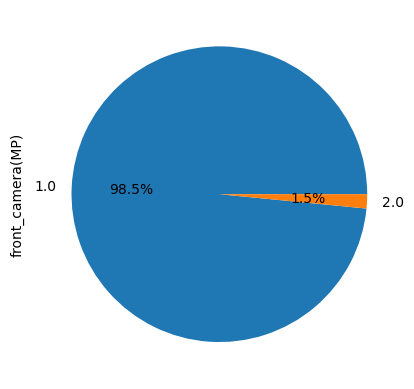

In [100]:
anda2['front_camera(MP)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [101]:
anda2['front_camera(MP)'].value_counts()

1.0    826
2.0     13
Name: front_camera(MP), dtype: int64

In [102]:
anda1['android_version'].value_counts()

ios        17
android    13
other       4
Name: android_version, dtype: int64

<AxesSubplot:title={'center':'OS used by costly phones above 1 lakh'}, ylabel='android_version'>

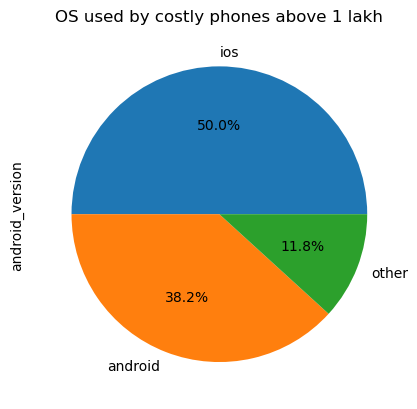

In [10]:
anda1['android_version'].value_counts().plot(kind='pie',autopct="%0.1f%%",title="OS used by costly phones above 1 lakh")
#Almost 50% of the costly phones above 1 lakh use the ios operating system while 94.1% of the cheap phones below 1 lakh use the
#android operating system.

<AxesSubplot:title={'center':'OS used by relatively cheaper phones below 1 lakh'}, ylabel='android_version'>

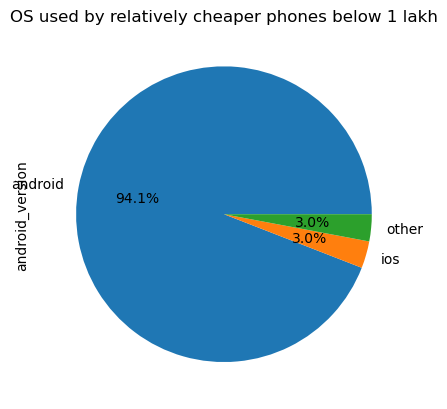

In [11]:
anda2['android_version'].value_counts().plot(kind='pie',autopct="%0.1f%%",title="OS used by relatively cheaper phones below 1 lakh")

In [105]:
anda2['android_version'].value_counts()

android    797
ios         25
other       25
Name: android_version, dtype: int64

In [106]:
anda1['extended_memory_upto'].isnull().sum()

34

In [107]:
anda1['extended_memory_upto'].value_counts()
#Ironic, costly phones above 1 lakh donot have any extended memory. So cost is not directly proportional to the existence of 
#extended memory.

Series([], Name: extended_memory_upto, dtype: int64)

In [108]:
anda1['primary_camera_rear'].value_counts()

48.0     16
50.0     10
200.0     4
64.0      2
12.0      2
Name: primary_camera_rear, dtype: int64

<AxesSubplot:ylabel='primary_camera_rear'>

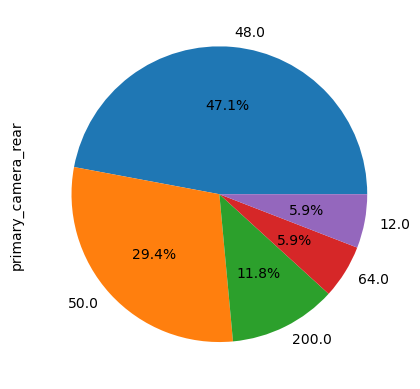

In [109]:
anda1['primary_camera_rear'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [110]:
anda1['primary_camera_rear'].describe() 
#There is not much of a difference between primary_camera_rear in terms of pixels for both costly phones and cheaper phones, both
#have almost the same IQR and median although mean of costly phones is a bit more( perhaps some huge outliers on the +ve side)

count     34.000000
mean      65.294118
std       50.868535
min       12.000000
25%       48.000000
50%       48.000000
75%       50.000000
max      200.000000
Name: primary_camera_rear, dtype: float64

<AxesSubplot:xlabel='primary_camera_rear'>

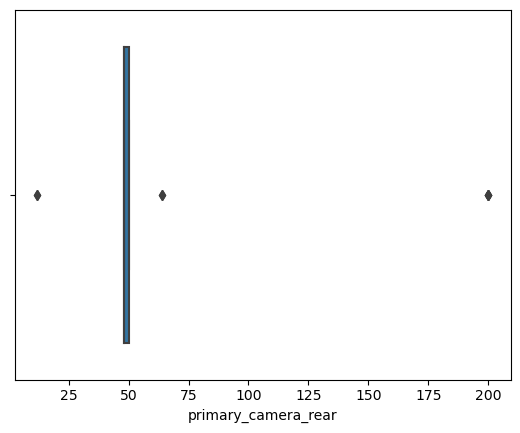

In [111]:
import seaborn as sns 
sns.boxplot(data=anda1,x='primary_camera_rear')

<AxesSubplot:xlabel='primary_camera_rear'>

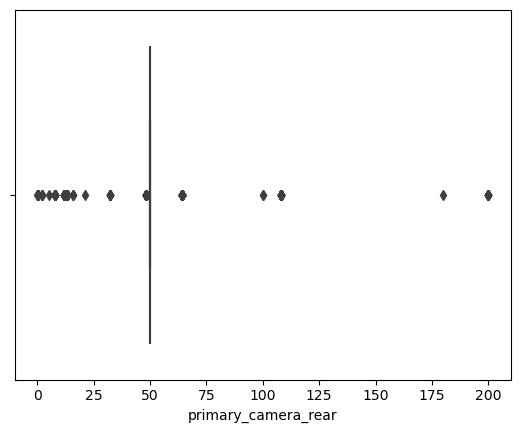

In [112]:
import seaborn as sns
sns.boxplot(data=anda2,x='primary_camera_rear')

In [113]:
anda2['primary_camera_rear'].describe()

count    847.000000
mean      54.534593
std       31.252784
min        0.000000
25%       50.000000
50%       50.000000
75%       50.000000
max      200.000000
Name: primary_camera_rear, dtype: float64

In [12]:
anda1['primary_camera_rear'].describe()

count     34.000000
mean      65.294118
std       50.868535
min       12.000000
25%       48.000000
50%       48.000000
75%       50.000000
max      200.000000
Name: primary_camera_rear, dtype: float64

In [114]:
anda2['primary_camera_rear'].value_counts()

50.0     447
64.0     117
108.0     71
48.0      71
13.0      45
12.0      27
8.0       23
200.0     17
32.0      10
0.3        6
2.0        4
16.0       3
100.0      2
180.0      1
0.0        1
5.0        1
21.0       1
Name: primary_camera_rear, dtype: int64

In [115]:
anda1['primary_camera_front'].describe()
#There is not much of a difference between megapixels of the primary_camera_front as far as cheap phones and costly phones are
#concerned and infact the median in case of cheaper phones for megapixels of primary_camera_front is more than median of 
#megapixels of primary_camera_front for costlier phones and even the mean and max value of the cheaper phones is higher.

count    34.000000
mean     15.411765
std       9.742496
min      10.000000
25%      12.000000
50%      12.000000
75%      12.000000
max      42.000000
Name: primary_camera_front, dtype: float64

In [116]:
anda2['primary_camera_front'].describe()

count    847.000000
mean      18.031169
std       12.697583
min        0.000000
25%        8.000000
50%       16.000000
75%       22.000000
max       50.000000
Name: primary_camera_front, dtype: float64

In [117]:
anda1['primary_camera_front'].value_counts()

12.0    22
10.0     7
42.0     3
32.0     2
Name: primary_camera_front, dtype: int64

In [118]:
anda1['primary_camera_']

KeyError: 'primary_camera_'

In [119]:
anda2['primary_camera_front'].value_counts()

16.0    222
8.0     178
32.0    139
5.0      76
50.0     65
13.0     63
12.0     33
20.0     23
10.0     19
0.0       9
10.5      5
2.0       3
10.8      2
40.0      2
24.0      2
44.0      2
25.0      2
0.3       1
7.0       1
Name: primary_camera_front, dtype: int64

In [120]:
anum.head()

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,80.0,1,6.67,1080 x 2400,120,2,1.0,android,2048.0,1,50.0,32.0
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,4.0,64.0,5160,18.0,1,6.88,720 x 1640,120,2,1.0,android,1024.0,1,50.0,5.0
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,12.0,256.0,5800,120.0,1,6.78,1264 x 2780,120,3,1.0,android,NaN,0,50.0,16.0
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,8.0,128.0,5100,67.0,1,6.67,1220 x 2712,120,3,1.0,android,NaN,0,200.0,16.0
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,67.0,1,6.72,1080 x 2400,120,3,1.0,android,1024.0,1,108.0,16.0


In [121]:
anum['brand_name'].value_counts()
#samsung=korean
#realme=chinese
#xiaomi=chinese
#vivo=chinese
#oppo=chinese
#pocco=chinese
#oneplus=chinese
#motorola=american
#apple=american
#infinix=china
#america=[mo,google,oukitel]
#china=[realme,xiaomi,vivo,oppo,pocco,oneplus,infinix,tecno,iqoo,itel,honor,ulefone,doogee,unihertz,blackview]
#india=[lava,ikall,nokia,micromax,cmf,jio,blackzone]
#british=[nothing,]
#finland=[hmd,]
#taiwan=[asus]

samsung      131
realme       122
xiaomi        94
vivo          88
oppo          56
poco          53
oneplus       47
motorola      47
apple         42
infinix       35
tecno         30
iqoo          28
lava          23
itel          17
google        14
nothing       11
honor          8
ikall          6
nokia          6
oukitel        4
hmd            3
micromax       3
ulefone        2
doogee         2
cmf            2
asus           2
unihertz       2
jio            1
blackview      1
blackzone      1
Name: brand_name, dtype: int64

In [122]:
z1=anum[anum['brand_name'].isin(['realme','xiaomi','vivo','oppo','pocco','oneplus','infinix','tecno','iqoo','itel','honor','ulefone','doogee','unihertz','blackview'])]

In [123]:
z1.shape

(532, 25)

In [124]:
def mnda(val):
    if val in ['realme','xiaomi','vivo','oppo','poco','oneplus','infinix','tecno','iqoo','itel','honor','ulefone','doogee','unihertz','blackview']:
        return 'china'
    elif val in ['mo','google','oukitel','motorola','apple']:
        return 'america'
    elif val in ['lava','ikall','nokia','micromax','cmf','jio','blackzone']:
        return 'india'
    elif val in ['nothing']:
        return 'britain'
    elif val in ['hmd']:
        return 'finland'
    elif val in ['asus']:
        return 'taiwan'
    elif val in ['samsung']:
        return 'korea'
    
        


In [125]:
anum['phonebrand_country']=anum['brand_name'].apply(mnda)

In [126]:
anum['phonebrand_country'].value_counts()

china      585
korea      131
america    107
india       42
britain     11
finland      3
taiwan       2
Name: phonebrand_country, dtype: int64

# We see how phone brands originating from china dominate the market making 66.4% of the products available in the market followed by korea and US

<AxesSubplot:ylabel='phonebrand_country'>

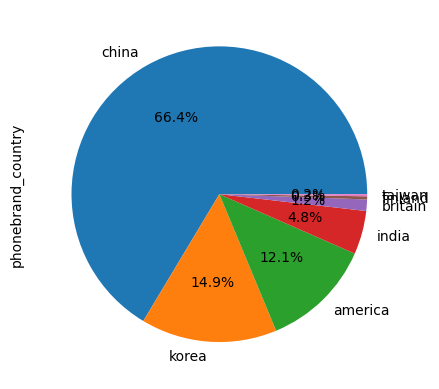

In [127]:
anum['phonebrand_country'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [128]:
anum.to_csv("D:/phonebrandCountryadded.csv",index=False)

In [129]:
anum[anum['phonebrand_country'].isin(['china'])]['processor_brand'].value_counts

<bound method IndexOpsMixin.value_counts of 0      snapdragon
1      snapdragon
2      snapdragon
3      snapdragon
4      snapdragon
5      snapdragon
8      snapdragon
9       dimensity
10      dimensity
14      dimensity
15     snapdragon
17     snapdragon
18      dimensity
20      dimensity
21     snapdragon
24     snapdragon
27      dimensity
28      dimensity
29      dimensity
30      dimensity
31     snapdragon
33     snapdragon
34     snapdragon
35     snapdragon
36     snapdragon
37      dimensity
40      dimensity
43      dimensity
44      dimensity
45     snapdragon
46     snapdragon
49     snapdragon
50      dimensity
52      dimensity
54      dimensity
55      dimensity
56     snapdragon
58      dimensity
59      dimensity
60      dimensity
61      dimensity
63      dimensity
65      dimensity
66     snapdragon
67     snapdragon
68     snapdragon
74      dimensity
76      dimensity
77     snapdragon
79     snapdragon
80     snapdragon
81     snapdragon
82     snapdragon
84

In [130]:
anum['processor_brand'].value_counts()
#us=['snapdragon','bionic','tensor','tiger','apple','qualcomm','google','qc8905','mediatek']
#taiwan=['dimensity','helio','a13','dimensit',]
#china=['unisoc','spreadtrum']
#korea=['exynos']

snapdragon    305
dimensity     286
helio         102
unisoc         58
exynos         55
bionic         34
tensor         12
tiger           7
apple           5
a13             3
spreadtrum      3
qualcomm        3
google          2
dimensit        2
qc8905          1
mediatek        1
Name: processor_brand, dtype: int64

In [167]:
def bch(val):
    if val in ['snapdragon','bionic','tensor','tiger','apple','qualcomm','google','qc8905','mediatek']:
        return 'america'
    elif val in ['dimensity','helio','a13','dimensit']:
        return 'taiwan'
    elif val in ['unisoc','spreadtrum']:
        return 'china'
    elif val in ['exynos']:
        return 'korea'

In [168]:
anum['processorbrand_country']=anum['processor_brand'].apply(bch)

In [169]:
anum.to_csv("D:/phonebrandCountryadded1.csv",index=False)

# As you can see from below, most processors in the market are still made by companies based in america and taiwan, companies based in china+korea together make barely 13% of the processors.

<AxesSubplot:ylabel='processorbrand_country'>

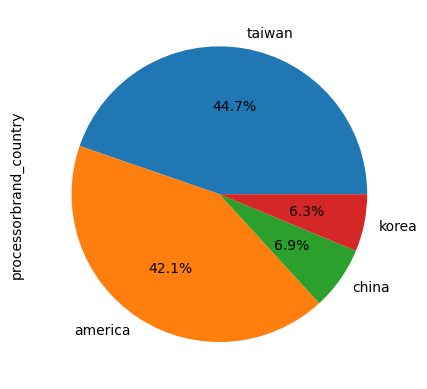

In [170]:
anum['processorbrand_country'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [134]:
aj1=anum[anum['phonebrand_country']=='china']['processorbrand_country'].value_counts()

# Ironically, most chinese phones still use processors that are made in companies based in or related to US or taiwan. Approx 54.7% of the phones made by the chinese companies use processors made by firms related to taiwan, 38.5% of the phones made by the chinese companies use processors made by firms related to US and barely 6.8% of these phones use processor made in chinese based firms


<AxesSubplot:title={'center':'Processor of phones of chinese brand'}, ylabel='processorbrand_country'>

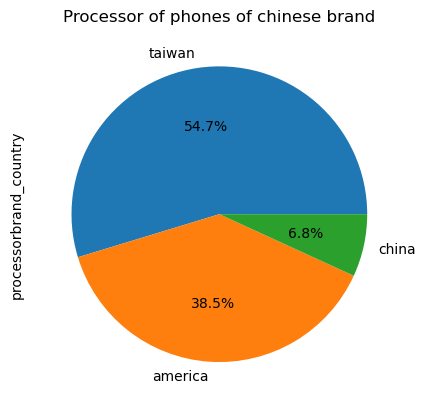

In [135]:
aj1.plot(kind='pie',title='Processor of phones of chinese brand',autopct="%0.1f%%")

# Most of the processors based in china are used by the chinese phonebrands only, barely 1/4th of it are used by indian phonebrands and 1/20th by some american phone brands.

<AxesSubplot:ylabel='phonebrand_country'>

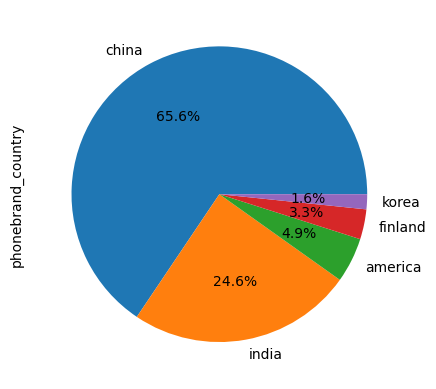

In [136]:
anum[anum['processorbrand_country']=='china']['phonebrand_country'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [137]:
aj4=anum[anum['phonebrand_country']=='india']['processorbrand_country'].value_counts()
aj4

taiwan     19
china      15
america     6
Name: processorbrand_country, dtype: int64

# 47.5% of the processors for indian phones are acquired from taiwanese based firms, 37.5% of the processors for indian phones are acquired from chinese firm and the rest of the processors are acquired from american firms.

<AxesSubplot:title={'center':'Indian companies borrow their processors from companies based in the following countries'}, ylabel='processorbrand_country'>

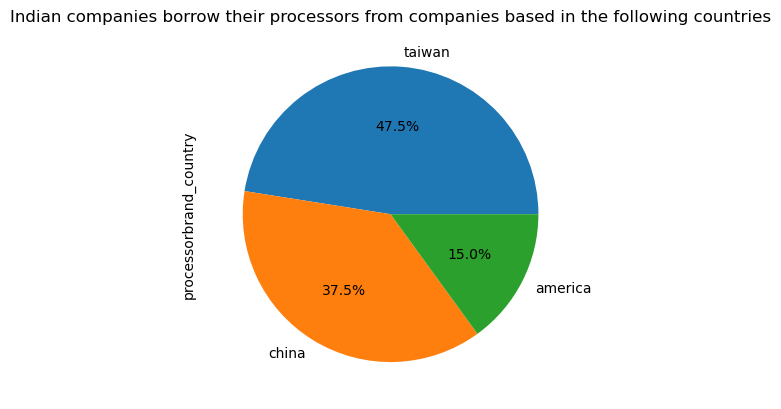

In [138]:
aj4.plot(kind='pie',autopct="%0.1f%%",title="Indian companies borrow their processors from companies based in the following countries")

In [139]:
anum[anum['phonebrand_country']=='america']['processorbrand_country'].value_counts()

america    84
taiwan     20
china       3
Name: processorbrand_country, dtype: int64

In [140]:
aj5=anum[anum['phonebrand_country']=='america']['processorbrand_country'].value_counts()
aj5

america    84
taiwan     20
china       3
Name: processorbrand_country, dtype: int64

# As expected most of the processors that american phones use are themselves american(78.5% of them), approx 1/5th of them(18.7%) use processors of company based in taiwan but surprisingly 2.8% of phones also use processors that are made by chinese based firms

<AxesSubplot:ylabel='processorbrand_country'>

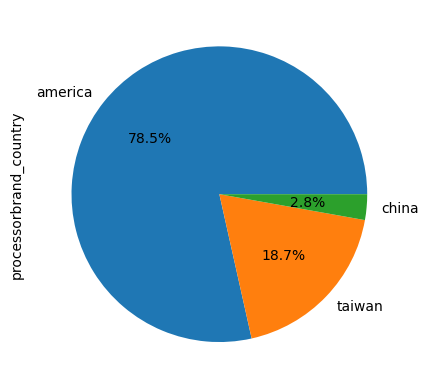

In [141]:
aj5.plot(kind='pie',autopct="%0.1f%%")

In [142]:
anum[(anum['phonebrand_country']=='america')&(anum['processorbrand_country']=='china')]

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country,processorbrand_country
147,motorola,Motorola Moto G04 (8 GB RAM + 128GB),7999,71,False,False,False,unisoc,8.0,1.0,8.0,128.0,5000,15.0,1,6.56,720 x 1600,90,1,1.0,android,1024.0,1,16.0,5.0,america,china
257,motorola,Motorola Moto G04,6999,65,False,False,False,unisoc,8.0,1.0,4.0,64.0,5000,15.0,1,6.56,720 x 1600,90,1,1.0,android,1024.0,1,16.0,5.0,america,china
321,motorola,Motorola Moto G04s,7299,69,False,False,False,unisoc,8.0,1.0,4.0,64.0,5000,15.0,1,6.60,720 x 1612,90,1,1.0,android,1024.0,1,50.0,5.0,america,china


In [143]:
anum[(anum['phonebrand_country']=='america')&(anum['brand_name']=='motorola')]

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country,processorbrand_country
6,motorola,Motorola Edge 50 Fusion,22999,85,True,True,False,snapdragon,8.0,2.0,8.0,128.0,5000,68.0,1,6.67,1080 x 2400,144,2,1.0,android,NaN,0,50.0,32.0,america,america
11,motorola,Motorola Moto G85 5G,17999,80,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,33.0,1,6.67,1080 x 2400,120,2,1.0,android,NaN,0,50.0,32.0,america,america
13,motorola,Motorola Edge 50 Pro 5G,27999,87,True,True,False,snapdragon,8.0,2.0,8.0,256.0,4500,68.0,1,6.70,1220 x 2712,144,3,1.0,android,NaN,0,50.0,50.0,america,america
22,motorola,Motorola Moto G45 5G,10999,76,True,False,False,snapdragon,8.0,2.0,4.0,128.0,5000,20.0,1,6.50,720 x 1600,120,2,1.0,android,1024.0,1,50.0,16.0,america,america
26,motorola,Motorola Moto Edge 50 Neo,22739,87,True,True,False,dimensity,8.0,2.0,8.0,256.0,4310,68.0,1,6.40,1220 x 2712,120,3,1.0,android,NaN,0,50.0,32.0,america,taiwan
42,motorola,Motorola Edge 50 Fusion (12GB RAM + 256GB),24999,87,True,True,False,snapdragon,8.0,2.0,12.0,256.0,5000,68.0,1,6.67,1080 x 2400,144,2,1.0,android,NaN,0,50.0,32.0,america,america
47,motorola,Motorola Moto G64 5G,14999,84,True,False,False,dimensity,8.0,2.0,8.0,128.0,6000,33.0,1,6.50,1080 x 2400,120,2,1.0,android,1024.0,1,50.0,16.0,america,taiwan
62,motorola,Motorola Moto G45 5G (8GB RAM + 128GB),12999,81,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,20.0,1,6.50,720 x 1600,120,2,1.0,android,1024.0,1,50.0,16.0,america,america
64,motorola,Motorola Moto G85 5G (12GB RAM + 256GB),19999,82,True,False,False,snapdragon,8.0,2.0,12.0,256.0,5000,33.0,1,6.67,1080 x 2400,120,2,1.0,android,NaN,0,50.0,32.0,america,america
72,motorola,Motorola Edge 50 Pro (12GB RAM + 256GB),31999,88,True,True,False,snapdragon,8.0,2.0,12.0,256.0,4500,125.0,1,6.70,1220 x 2712,144,3,1.0,android,NaN,0,50.0,50.0,america,america


In [144]:
anum['processor_brand'].value_counts()

snapdragon    305
dimensity     286
helio         102
unisoc         58
exynos         55
bionic         34
tensor         12
tiger           7
apple           5
a13             3
spreadtrum      3
qualcomm        3
google          2
dimensit        2
qc8905          1
mediatek        1
Name: processor_brand, dtype: int64

In [145]:
anum['brand_name']

0           vivo
1         xiaomi
2         realme
3         xiaomi
4        oneplus
5           vivo
6       motorola
7        samsung
8           vivo
9         xiaomi
10          oppo
11      motorola
12       samsung
13      motorola
14          iqoo
15        xiaomi
16       samsung
17          vivo
18        xiaomi
19       samsung
20          oppo
21       oneplus
22      motorola
23       samsung
24          vivo
25           cmf
26      motorola
27          oppo
28          vivo
29        realme
30          oppo
31       oneplus
32       samsung
33          vivo
34       oneplus
35       oneplus
36        realme
37          vivo
38       samsung
39       samsung
40       infinix
41       samsung
42      motorola
43        realme
44          vivo
45        xiaomi
46          vivo
47      motorola
48         apple
49          iqoo
50          vivo
51       samsung
52          oppo
53         apple
54          poco
55        xiaomi
56       oneplus
57       samsung
58          po

In [146]:
# anum.to_csv("D:/phonebrandCountryadded.csv",index=False)
import pandas as pd 
anc=pd.read_csv("D:/phonebrandCountryadded.csv")
anc.head()

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,80.0,1,6.67,1080 x 2400,120,2,1.0,android,2048.0,1,50.0,32.0,china
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,4.0,64.0,5160,18.0,1,6.88,720 x 1640,120,2,1.0,android,1024.0,1,50.0,5.0,china
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,12.0,256.0,5800,120.0,1,6.78,1264 x 2780,120,3,1.0,android,NaN,0,50.0,16.0,china
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,8.0,128.0,5100,67.0,1,6.67,1220 x 2712,120,3,1.0,android,NaN,0,200.0,16.0,china
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,67.0,1,6.72,1080 x 2400,120,3,1.0,android,1024.0,1,108.0,16.0,china


In [147]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Samsung phones still dominate the market followed by realme,xiaomi,vivi,oppo,poco,oneplus,motorola,apple and infinix

<AxesSubplot:>

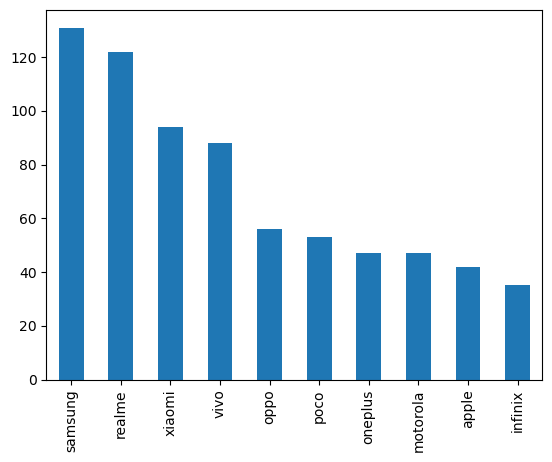

In [148]:
#plot the graph of top 5 brands
anc['brand_name'].value_counts().head(10).plot(kind='bar')

In [149]:
anc['cost'].describe()
#The mean is much more than median...which points out at the existence of many more outliers on the right side
#Let us evaluate this below

count       881.000000
mean      28206.886493
std       28793.186821
min        1860.000000
25%       11499.000000
50%       19490.000000
75%       29999.000000
max      200999.000000
Name: cost, dtype: float64

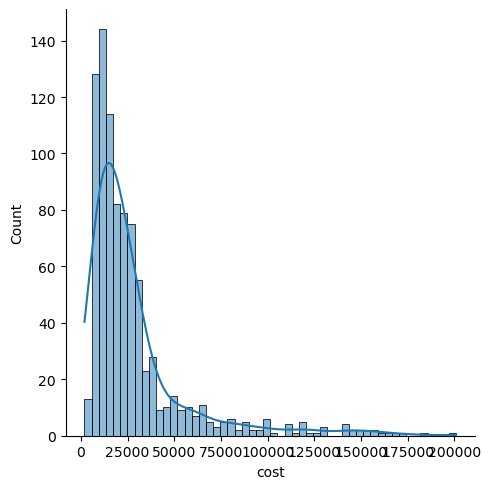

In [150]:
import seaborn as sns 
sns.displot(kind='hist',data=anc,x='cost',kde=True)

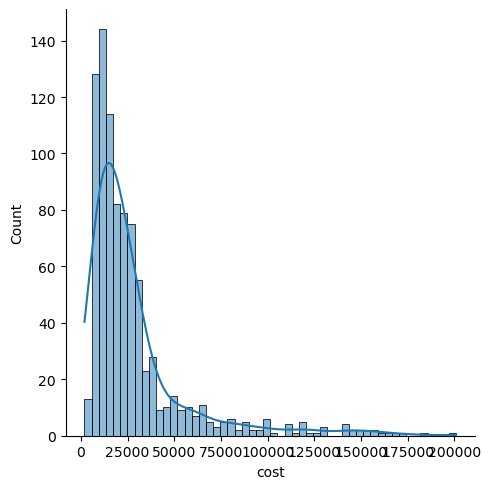

In [151]:
import seaborn as sns
sns.displot(kind='hist',data=anc,x='cost',kde=True)
#as concluded the data is not normally distributed and it has a lot of outliers to the right

In [152]:
anc['cost'].skew() 
#As you can see that the data is immensely right skewed

2.77372189049016

<AxesSubplot:xlabel='cost'>

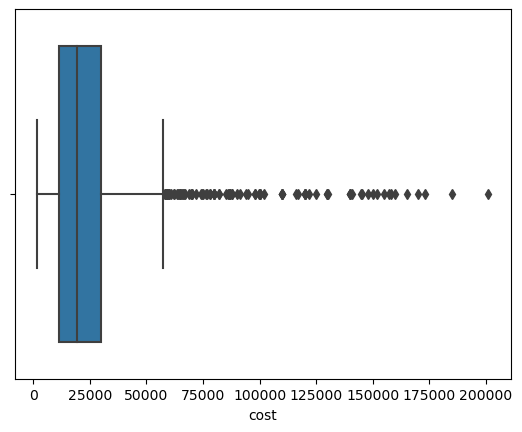

In [153]:
import seaborn as sns
sns.boxplot(data=anc,x='cost')
#as you can see there are many outliers on the right side

In [154]:
anc['spec_score'].describe()
#median is almsot the same as mean but mean is a little bit lesser than median and hence it appears that there must be some 
#outliers on the left side

count    881.000000
mean      79.946652
std       10.032362
min       15.000000
25%       76.000000
50%       82.000000
75%       86.000000
max       98.000000
Name: spec_score, dtype: float64

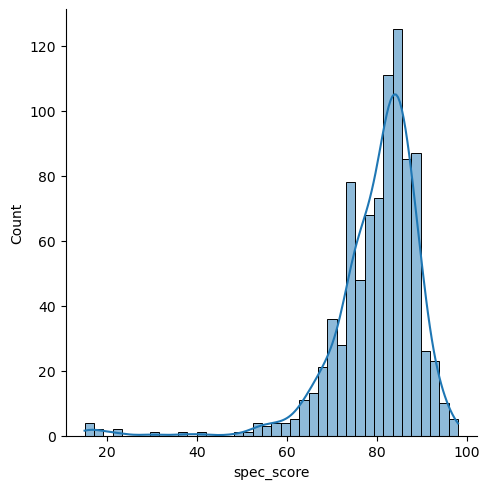

In [155]:
import seaborn as sns 
sns.displot(data=anc,x='spec_score',kde=True)

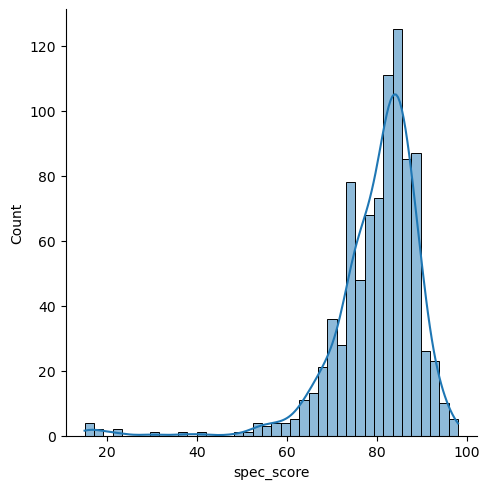

In [156]:
import seaborn as sns 
sns.displot(data=anc,x='spec_score',kde=True)
#As you can see, this data is specifically tilted on the left

In [157]:
anc['spec_score'].skew() 
#As guessed right, the data of this column is highly skewed towards the negative side

-2.731490032233601

<AxesSubplot:xlabel='spec_score'>

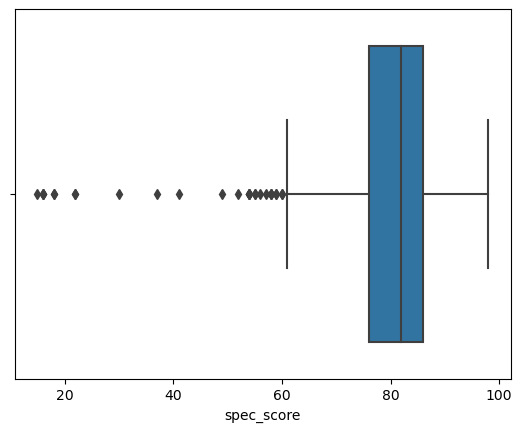

In [158]:
import seaborn as sns 
sns.boxplot(data=anc,x='spec_score')
#As we can see there are a lot of outliers to the left as expected

# Most of the phones currently in the market already have 5g and only 1/4th of them donot have 5g

<AxesSubplot:ylabel='has_5g'>

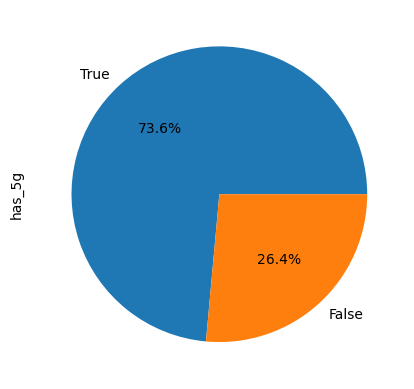

In [159]:
anc['has_5g'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# Only 39% of the phones in the market have nfc while 61% of the phones donot have nfc

<AxesSubplot:ylabel='has_nfc'>

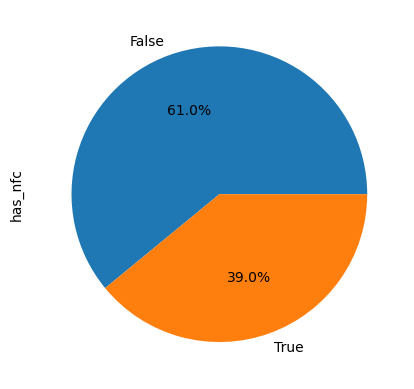

In [160]:
anc['has_nfc'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# Barely 1/5th of the phones have irblaster, the rest of the phones donot have irblaster

<AxesSubplot:ylabel='has_irblaster'>

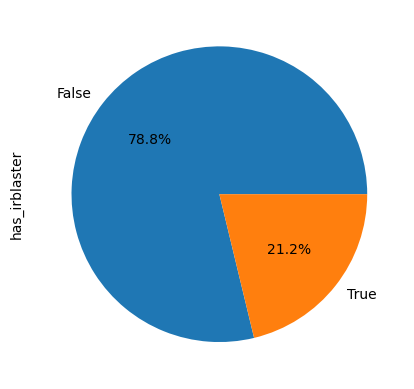

In [161]:
anc['has_irblaster'] .value_counts().plot(kind='pie',autopct="%0.1f%%")

# As you can see, 100% of the phones having irblaster are related to firms based in china.

<AxesSubplot:ylabel='phonebrand_country'>

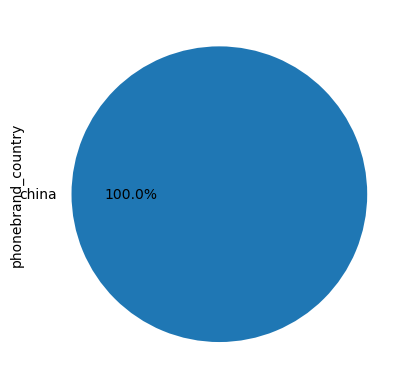

In [162]:
anc[anc['has_irblaster']==True]['phonebrand_country'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [164]:
anc['processor_brand'].value_counts()

snapdragon    305
dimensity     286
helio         102
unisoc         58
exynos         55
bionic         34
tensor         12
tiger           7
apple           5
a13             3
spreadtrum      3
qualcomm        3
google          2
dimensit        2
qc8905          1
mediatek        1
Name: processor_brand, dtype: int64

# Almost 67% of the processors available below belong to the brands of snapdragon and dimensity respectively followed by helop, unisoc respectively

<AxesSubplot:ylabel='processor_brand'>

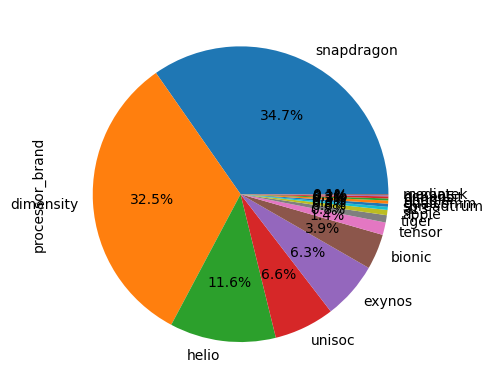

In [165]:
import seaborn as sns
anc['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [166]:
anc['ph']

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,80.0,1,6.67,1080 x 2400,120,2,1.0,android,2048.0,1,50.0,32.0,china
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,4.0,64.0,5160,18.0,1,6.88,720 x 1640,120,2,1.0,android,1024.0,1,50.0,5.0,china
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,12.0,256.0,5800,120.0,1,6.78,1264 x 2780,120,3,1.0,android,NaN,0,50.0,16.0,china
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,8.0,128.0,5100,67.0,1,6.67,1220 x 2712,120,3,1.0,android,NaN,0,200.0,16.0,china
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,67.0,1,6.72,1080 x 2400,120,3,1.0,android,1024.0,1,108.0,16.0,china


In [1]:
import pandas as pd
anc1=pd.read_csv("D:/phonebrandCountryadded1.csv")
anc1.head() 

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),...,refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country,processorbrand_country
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,...,120,2,1.0,android,2048.0,1,50.0,32.0,china,america
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,...,120,2,1.0,android,1024.0,1,50.0,5.0,china,america
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,...,120,3,1.0,android,NaN,0,50.0,16.0,china,america
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,...,120,3,1.0,android,NaN,0,200.0,16.0,china,america
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,...,120,3,1.0,android,1024.0,1,108.0,16.0,china,america


In [172]:
anc1['processorbrand_country'].isnull().sum()

2

# Processors belonging to companies based in taiwan and america still dominate the market

<AxesSubplot:ylabel='processorbrand_country'>

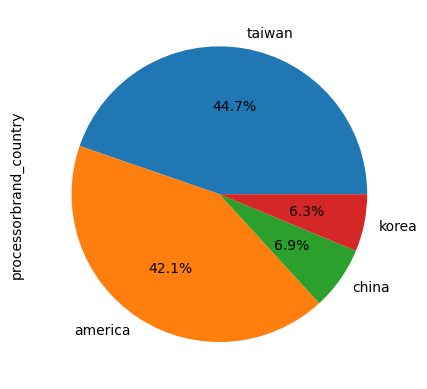

In [174]:
anc1['processorbrand_country'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# Almost 92% of the phones available in the market are 8 cores, approx 1/20th of the phones available in the market are 6 cores

<AxesSubplot:ylabel='num_cores'>

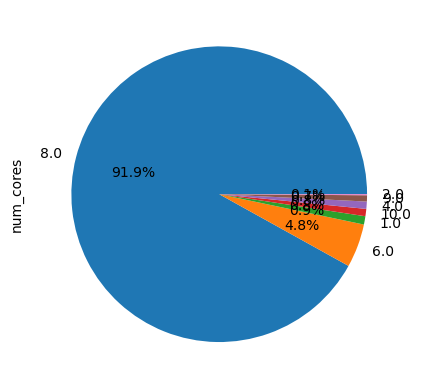

In [177]:
anc1['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# As you can see, almost 90% of the phones have fast charging available....

<AxesSubplot:ylabel='fast_charging_available'>

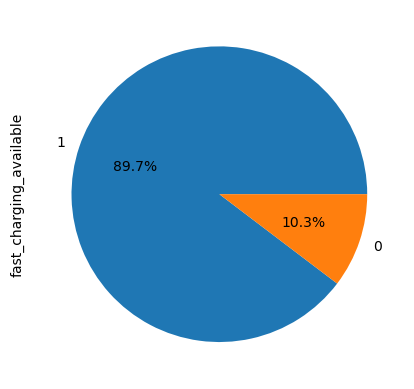

In [181]:
anc1['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [183]:
anc1[(anc1['fast_charging_available']==0)]['cost']

count        91.000000
mean      49314.549451
std       52576.766458
min        1860.000000
25%        7949.000000
50%       24299.000000
75%       80949.500000
max      184900.000000
Name: cost, dtype: float64

# So 18% of the total phones that have no fast charging available are costly phones above 1 lakh which by the way is 50% of the total costly phones available in the market

In [194]:
percentage_ofcostlyphones=len(anc1[(anc1['fast_charging_available']==0)&(anc1['cost']>100000)])/len(anc1[(anc1['fast_charging_available']==0)]['cost'])

In [198]:
anc1[(anc1['fast_charging_available']==0)&(anc1['cost']>100000)].shape

(17, 27)

In [193]:
no_of_phones_above_1lakh=len(anc1[anc1['cost']>100000])
no_of_phones_above_1lakh

34

In [195]:
percentage_ofcostlyphones*100 

18.681318681318682

# 41% of the phones have a 8GB ram, 20% of them have 4 GB ram, 17% of them have 6 GB ram, 15.7% have 12 GB RAM and so on

<AxesSubplot:ylabel='ram_capacity(GB)'>

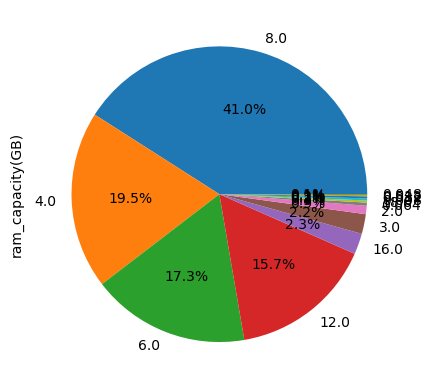

In [201]:
anc1['ram_capacity(GB)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# 46.3% of the phones have an internal capacity of 128 GB, 28.9% of the people have an internal capacity of 256 GB , 13.7% have an internal capacity of 64 GB and so on.

<AxesSubplot:ylabel='internal_capacity(GB)'>

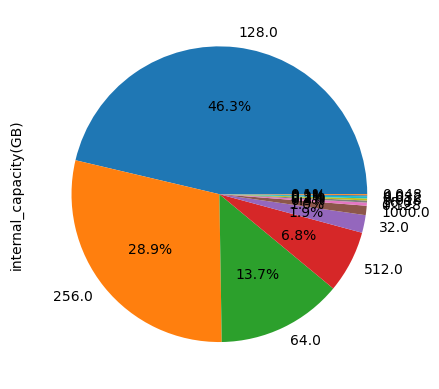

In [203]:
anc1['internal_capacity(GB)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# More than half of the phones available have a refresh rate of 55%, it is followed by refresh rate of 90 which is found amongst 23.6% of the phones

<AxesSubplot:ylabel='refresh_rate(Hz)'>

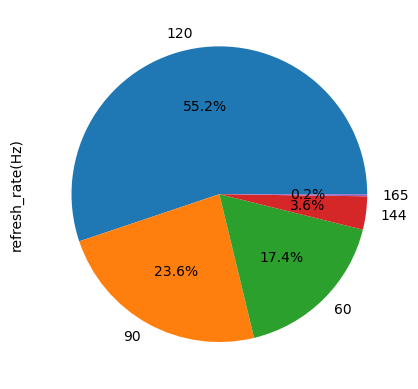

In [6]:
anc1['refresh_rate(Hz)'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# 43.5% of the phones have 4 cameras and 42.5% of the phones have 3 cameras. So almost 86% of the phones have 4 or 3 cameras.

<AxesSubplot:ylabel='None'>

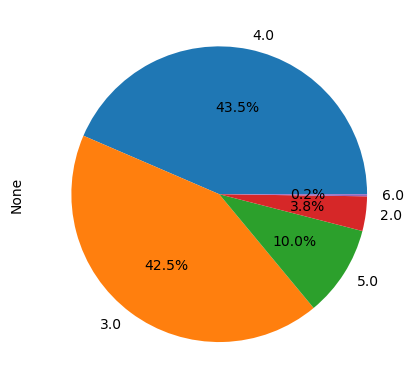

In [11]:
(anc1['rear_camera(MP)']+anc1['front_camera(MP)']).value_counts().plot(kind='pie',autopct="%0.1f%%")

# Almost 92% of the phones use android as operating system which is followed by ios which is used merely in 4.8% of the phones

<AxesSubplot:ylabel='android_version'>

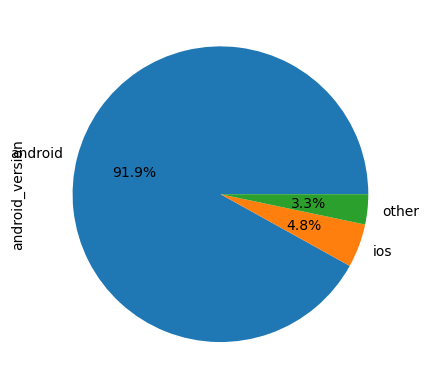

In [14]:
anc1['android_version'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# Approximately half of the phones have extended memory available but the rest of them donot have any extended memory available

<AxesSubplot:ylabel='extended_memory_available'>

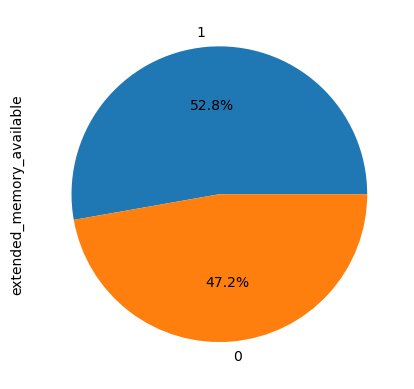

In [5]:
anc1['extended_memory_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

# 63% of the phones have an extended memory of upto 1 TB, 16.8% of them even have an extended memory upto 2 TB and almost 11% of the phones have an extended memory of upto 512 GB. So, almost 91% of the phones who do have extended memory available have a very high extended memory.

<AxesSubplot:ylabel='extended_memory_upto'>

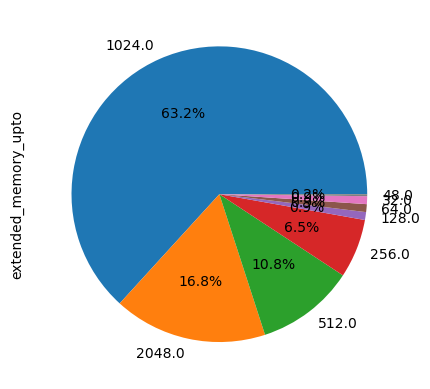

In [10]:
anc1['extended_memory_upto'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [23]:
import seaborn as sns 
def plot_graphs1(col):
    sns.displot(kind='hist',data=anc1,x=col,label=col,kde=True)
    sns.catplot(kind='box',data=anc1,x=col)

In [24]:
all_col=anc1.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

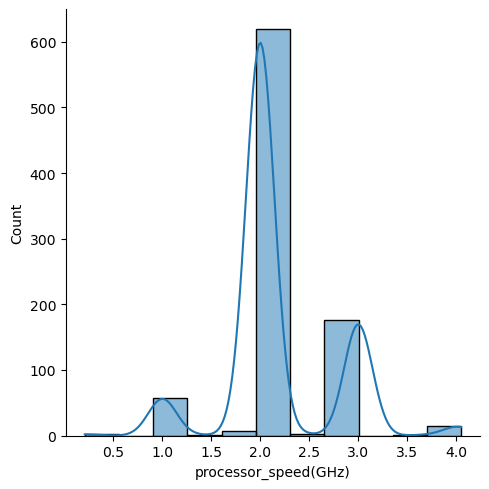

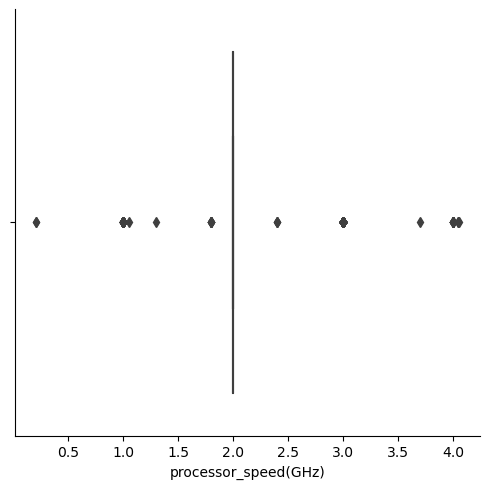

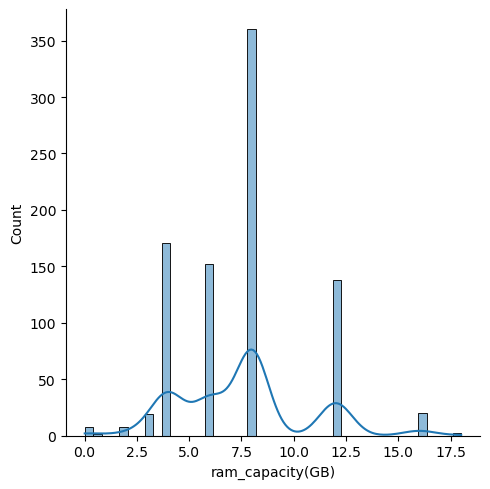

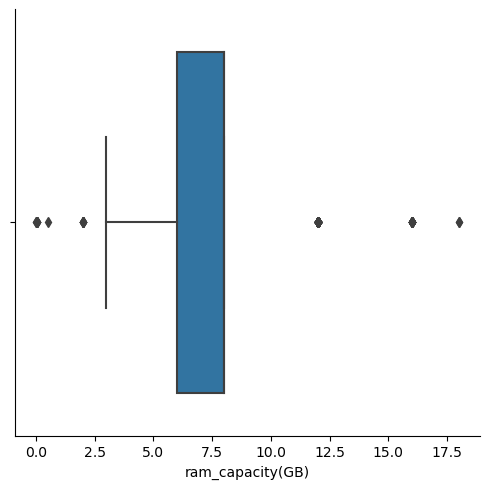

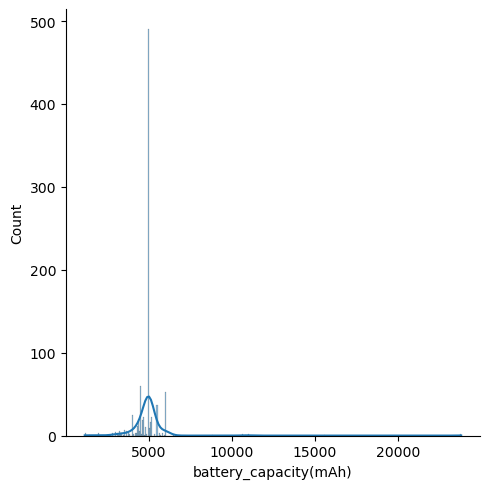

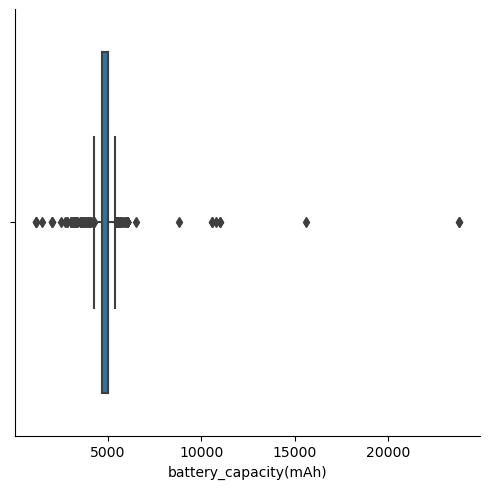

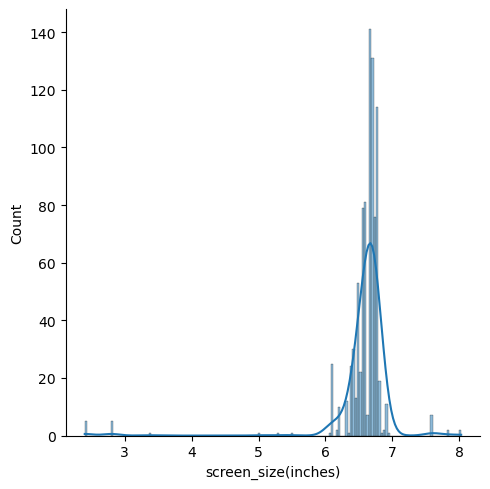

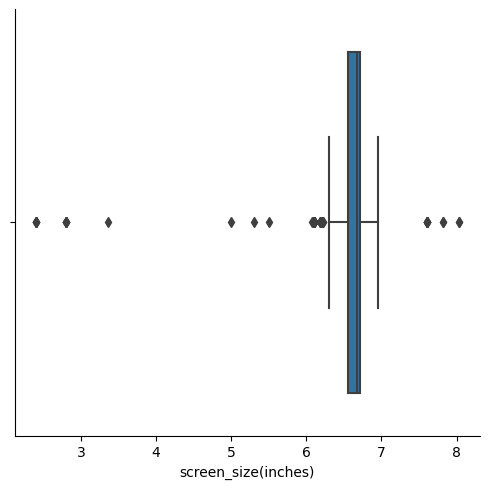

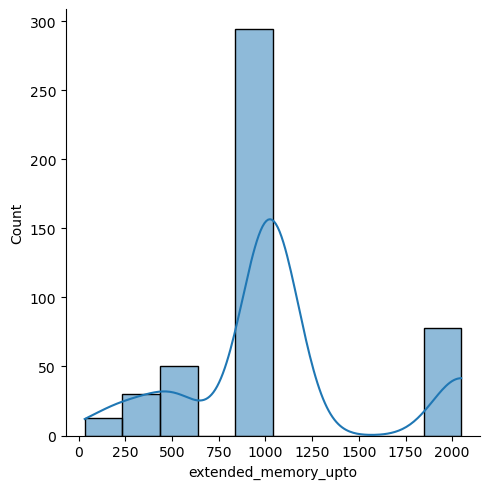

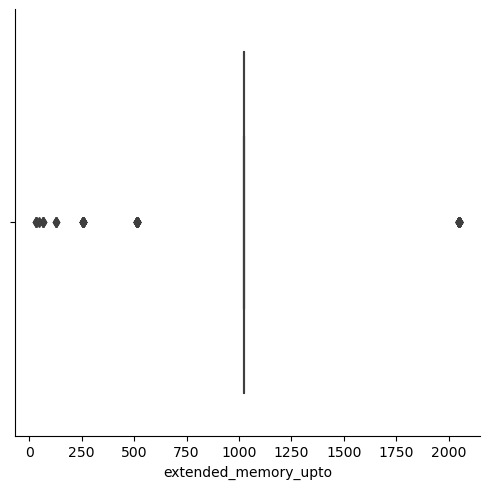

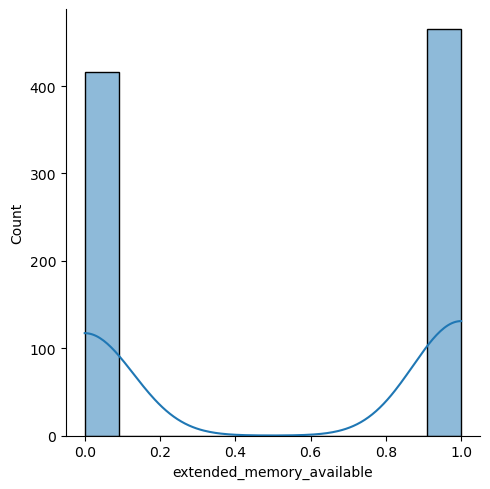

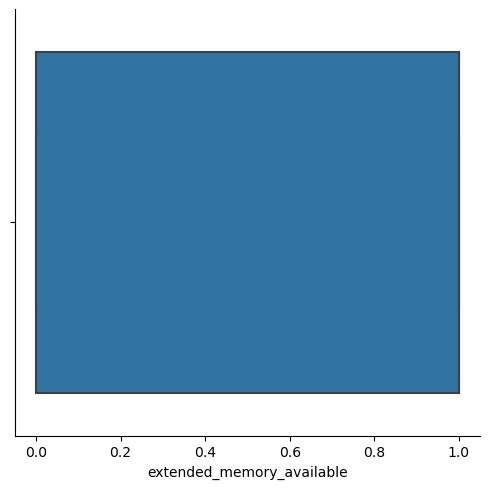

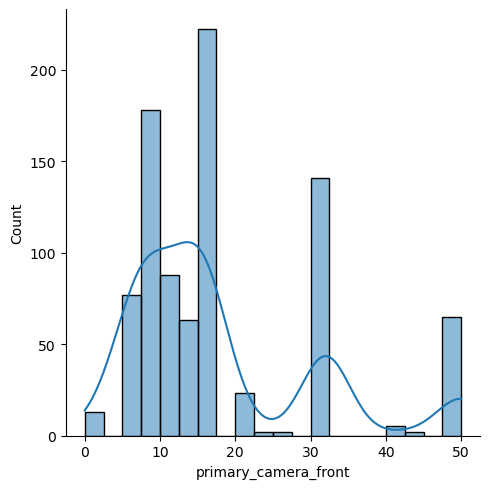

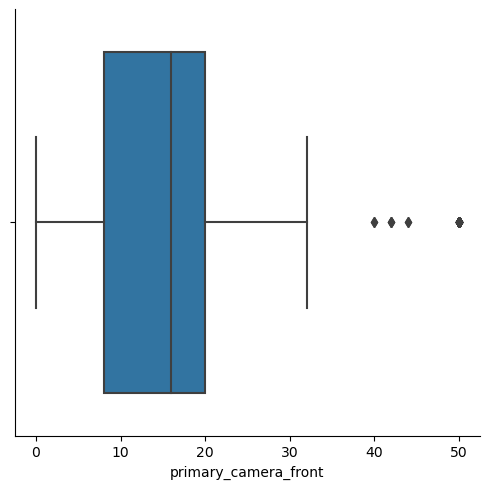

In [25]:
for col in all_col:
    plot_graphs1(col)

In [26]:
import seaborn as sns
def plot_graph1(col):
    sns.displot(kind='hist',data=anc1,x=col,label=col,kde=True)
    sns.catplot(kind='box',data=anc1,x=col)

In [27]:
all_col1=anc1.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

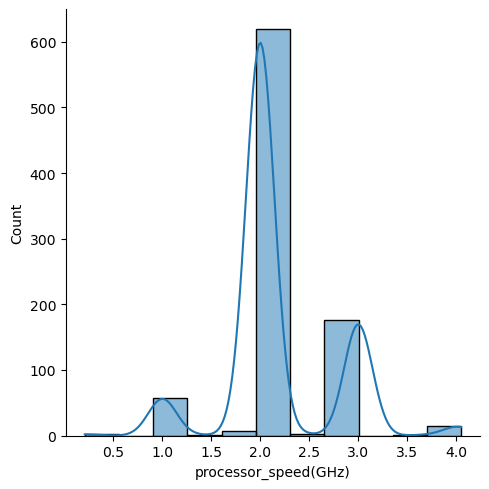

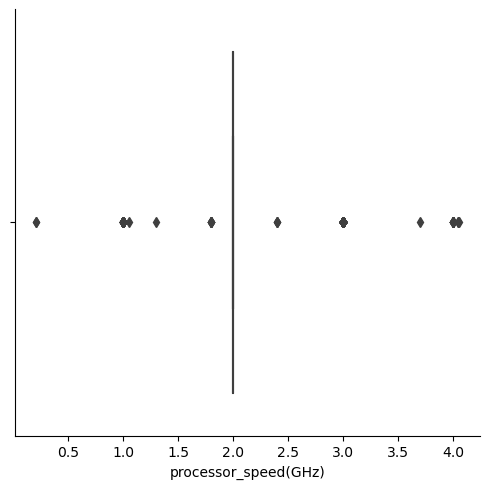

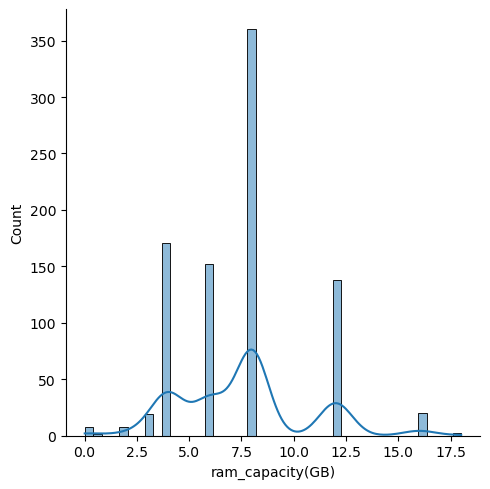

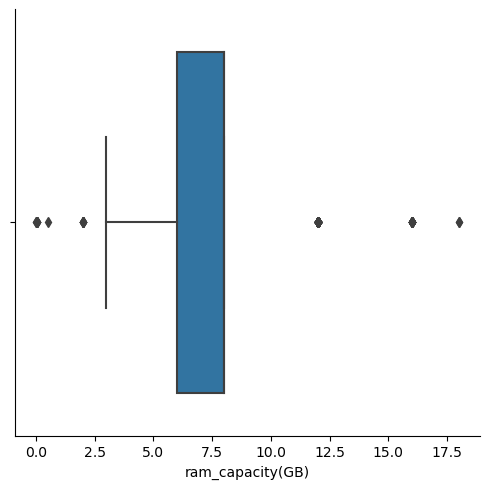

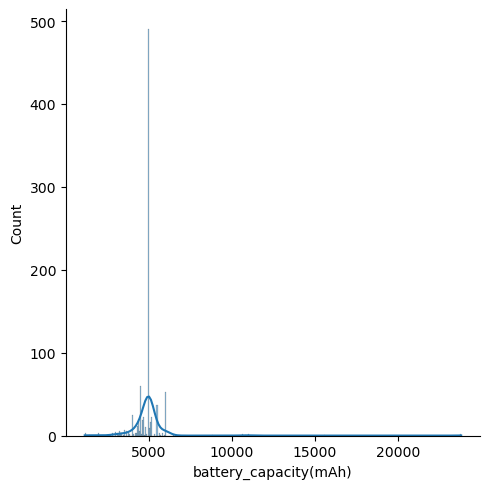

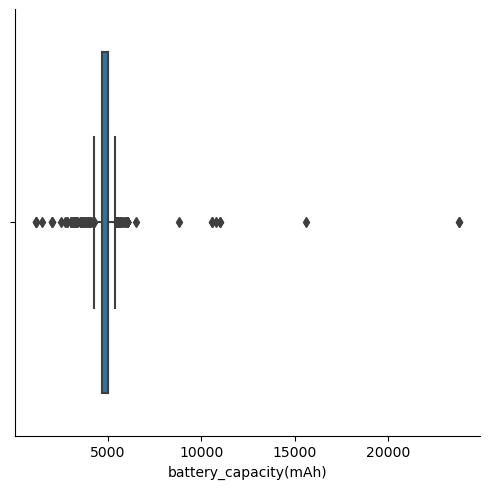

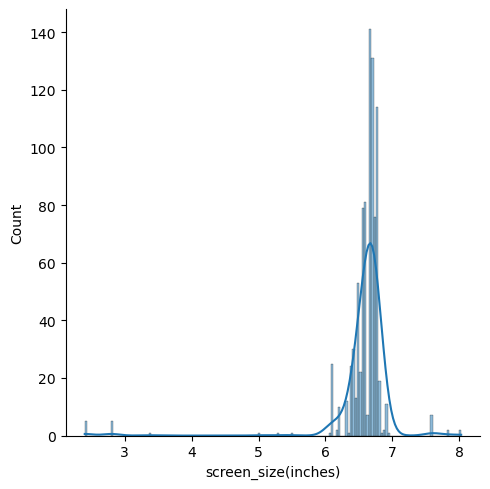

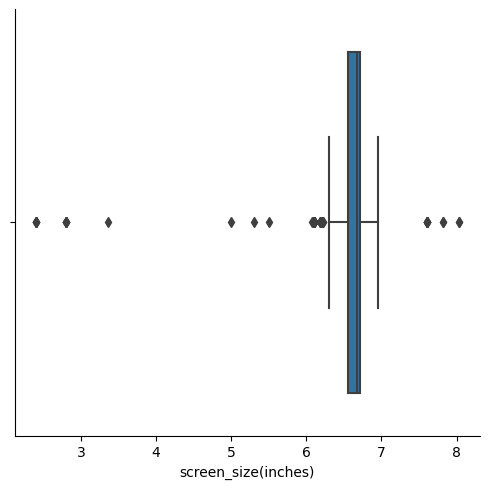

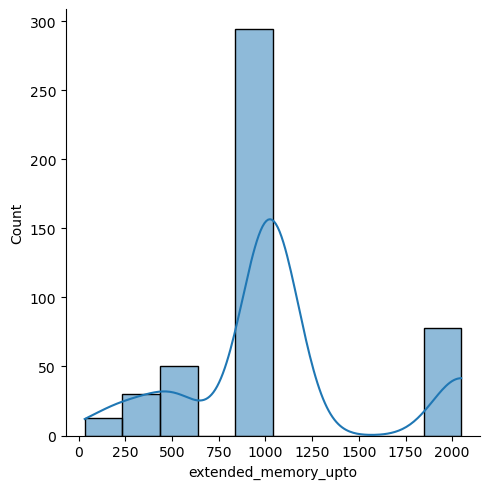

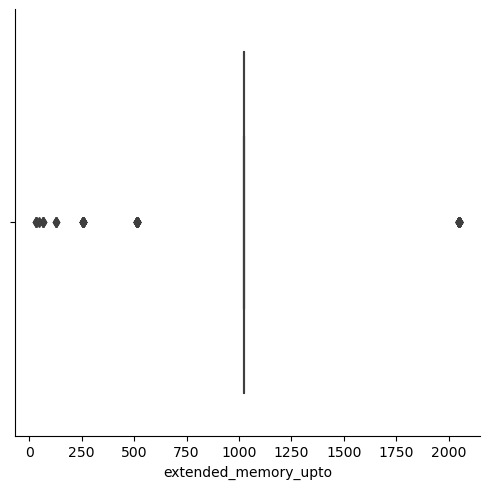

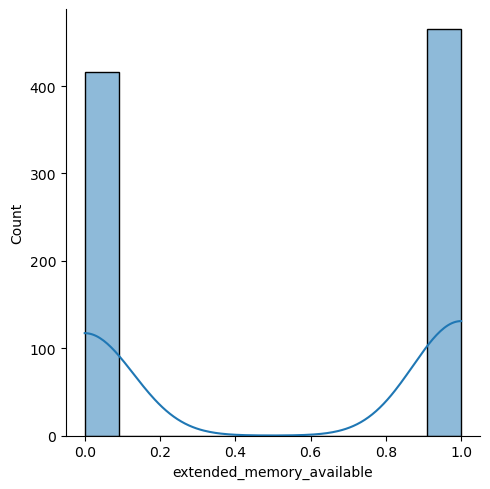

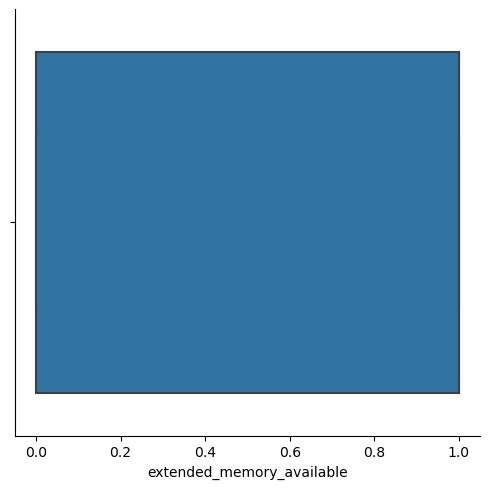

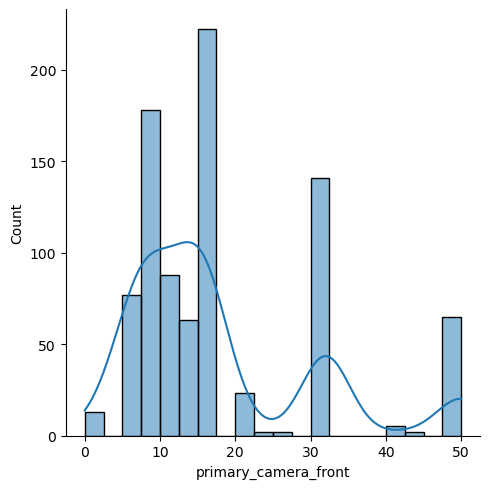

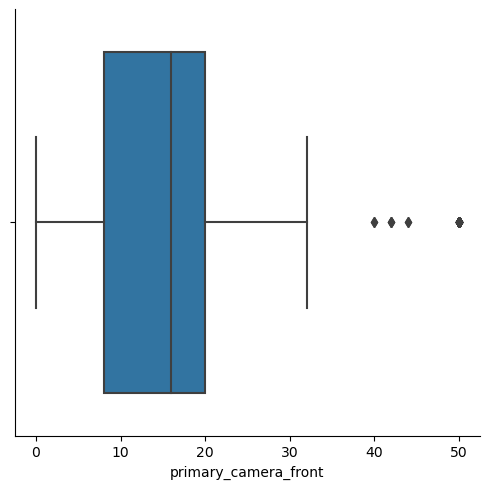

In [28]:
for col in all_col1:
    plot_graph1(col)

<AxesSubplot:xlabel='brand_name', ylabel='cost'>

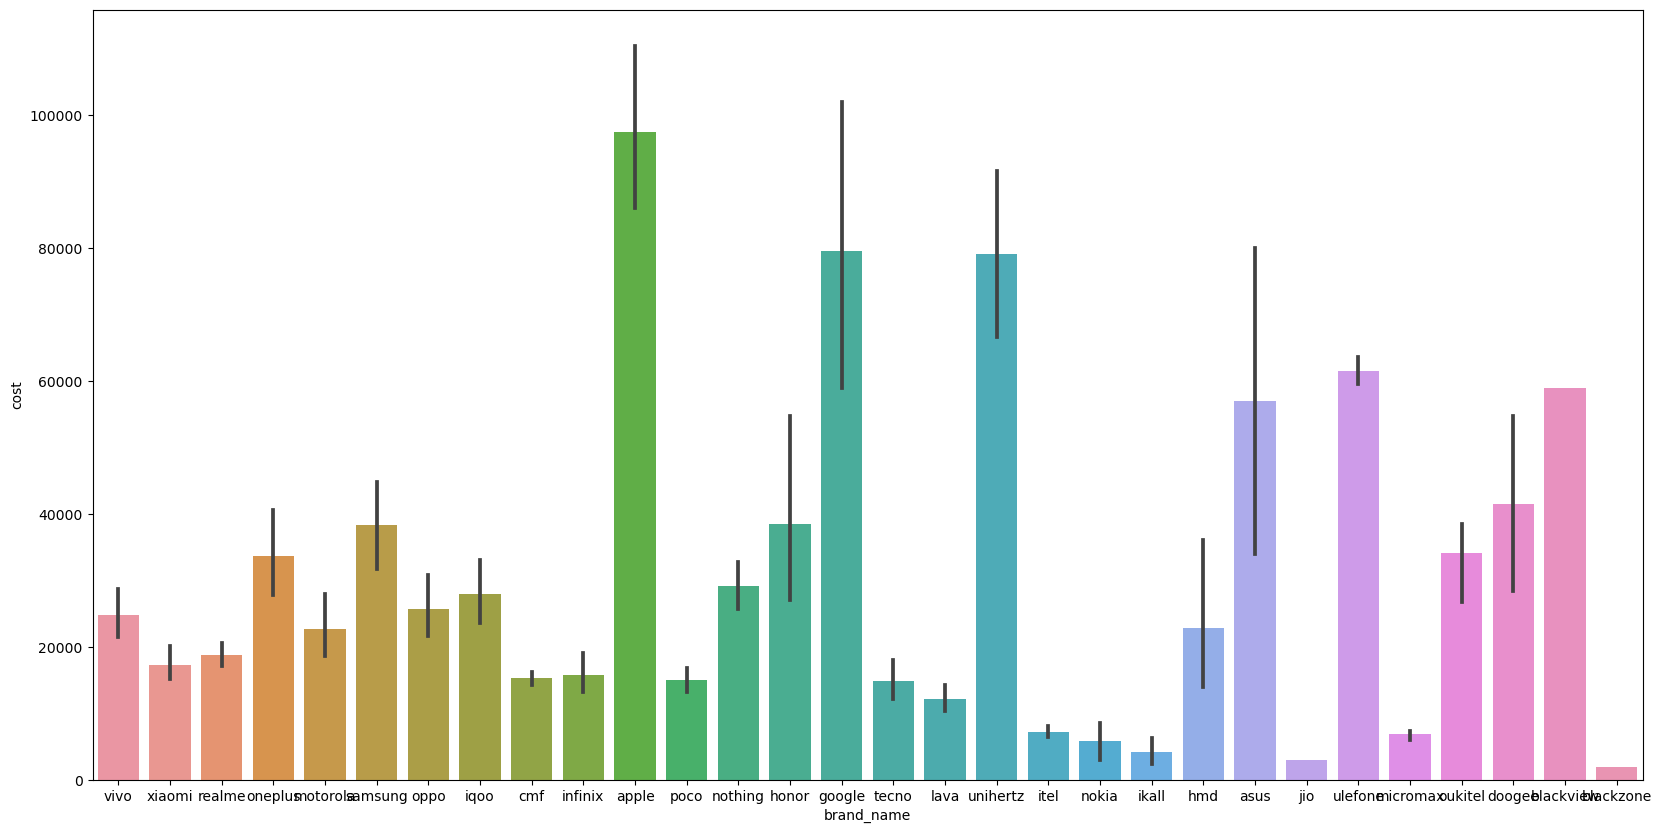

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))#meaning a width of 20 units and a height of 10
sns.barplot(data=anc1,x='brand_name',y='cost')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'vivo'),
  Text(1, 0, 'xiaomi'),
  Text(2, 0, 'realme'),
  Text(3, 0, 'oneplus'),
  Text(4, 0, 'motorola'),
  Text(5, 0, 'samsung'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'iqoo'),
  Text(8, 0, 'cmf'),
  Text(9, 0, 'infinix'),
  Text(10, 0, 'apple'),
  Text(11, 0, 'poco'),
  Text(12, 0, 'nothing'),
  Text(13, 0, 'honor'),
  Text(14, 0, 'google'),
  Text(15, 0, 'tecno'),
  Text(16, 0, 'lava'),
  Text(17, 0, 'unihertz'),
  Text(18, 0, 'itel'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'ikall'),
  Text(21, 0, 'hmd'),
  Text(22, 0, 'asus'),
  Text(23, 0, 'jio'),
  Text(24, 0, 'ulefone'),
  Text(25, 0, 'micromax'),
  Text(26, 0, 'oukitel'),
  Text(27, 0, 'doogee'),
  Text(28, 0, 'blackview'),
  Text(29, 0, 'blackzone')])

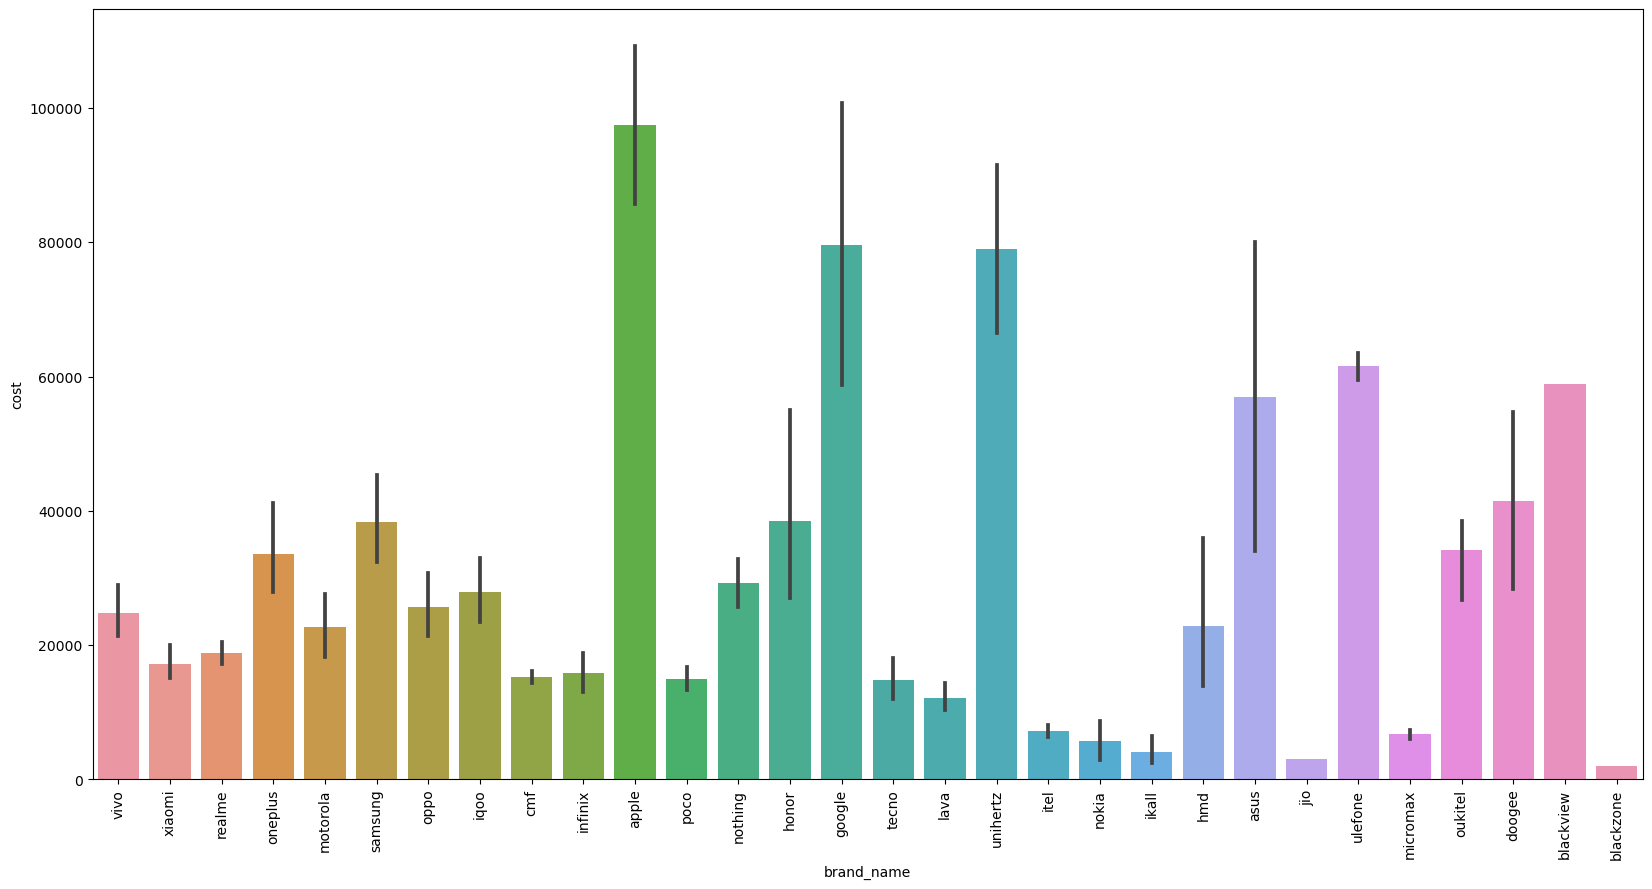

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(data=anc1,x='brand_name',y='cost')
plt.xticks(rotation='vertical')

# From the above graph, we find out tht apple phones are the costliest followed by google, unihertz, ulefone,asus and blackview

In [32]:
anc1.head()

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),...,refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country,processorbrand_country
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,...,120,2,1.0,android,2048.0,1,50.0,32.0,china,america
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,...,120,2,1.0,android,1024.0,1,50.0,5.0,china,america
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,...,120,3,1.0,android,NaN,0,50.0,16.0,china,america
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,...,120,3,1.0,android,NaN,0,200.0,16.0,china,america
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,...,120,3,1.0,android,1024.0,1,108.0,16.0,china,america


In [33]:
#But if i want to analyze average price of phone_brands which atleast have 10 phones in the list then this is how we do it

In [37]:
x1=anc1.groupby('brand_name')['phone_name'].count()
x1

brand_name
apple         42
asus           2
blackview      1
blackzone      1
cmf            2
doogee         2
google        14
hmd            3
honor          8
ikall          6
infinix       35
iqoo          28
itel          17
jio            1
lava          23
micromax       3
motorola      47
nokia          6
nothing       11
oneplus       47
oppo          56
oukitel        4
poco          53
realme       122
samsung      131
tecno         30
ulefone        2
unihertz       2
vivo          88
xiaomi        94
Name: phone_name, dtype: int64

In [40]:
x1[x1>10].index

Index(['apple', 'google', 'infinix', 'iqoo', 'itel', 'lava', 'motorola',
       'nothing', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'tecno',
       'vivo', 'xiaomi'],
      dtype='object', name='brand_name')

In [41]:
temp_df=anc1[anc1['brand_name'].isin(x1[x1>10].index)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'vivo'),
  Text(1, 0, 'xiaomi'),
  Text(2, 0, 'realme'),
  Text(3, 0, 'oneplus'),
  Text(4, 0, 'motorola'),
  Text(5, 0, 'samsung'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'iqoo'),
  Text(8, 0, 'infinix'),
  Text(9, 0, 'apple'),
  Text(10, 0, 'poco'),
  Text(11, 0, 'nothing'),
  Text(12, 0, 'google'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'lava'),
  Text(15, 0, 'itel')])

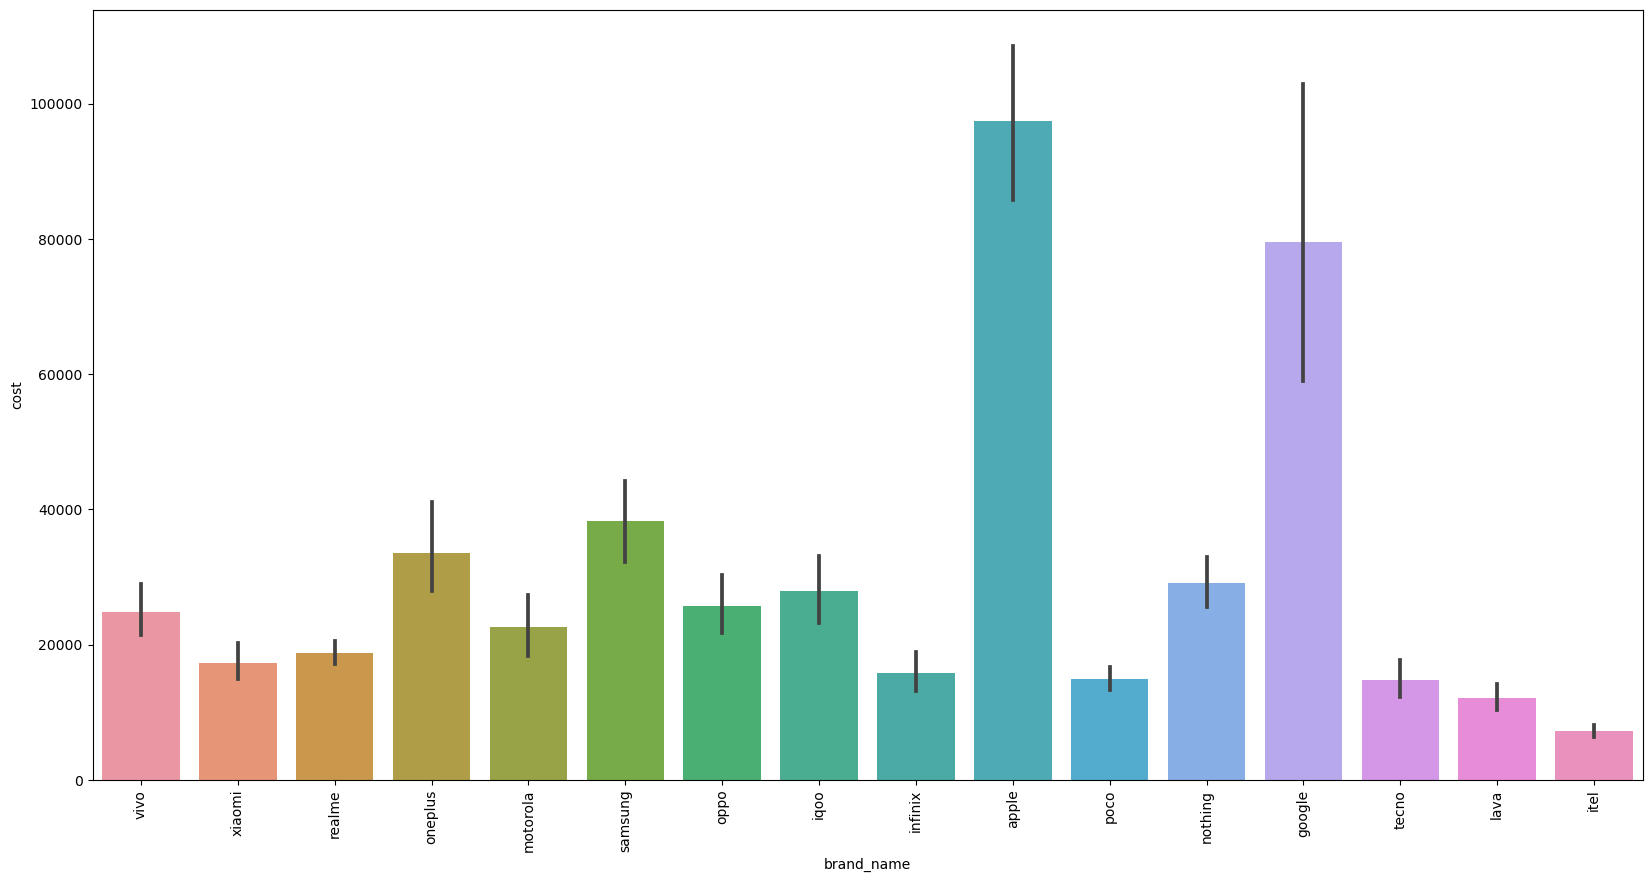

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(data=temp_df,x='brand_name',y='cost')
plt.xticks(rotation='vertical')

In [45]:
a=anc1.groupby('brand_name')['cost'].count()
a

brand_name
apple         42
asus           2
blackview      1
blackzone      1
cmf            2
doogee         2
google        14
hmd            3
honor          8
ikall          6
infinix       35
iqoo          28
itel          17
jio            1
lava          23
micromax       3
motorola      47
nokia          6
nothing       11
oneplus       47
oppo          56
oukitel        4
poco          53
realme       122
samsung      131
tecno         30
ulefone        2
unihertz       2
vivo          88
xiaomi        94
Name: cost, dtype: int64

In [46]:
a[a>10]

brand_name
apple        42
google       14
infinix      35
iqoo         28
itel         17
lava         23
motorola     47
nothing      11
oneplus      47
oppo         56
poco         53
realme      122
samsung     131
tecno        30
vivo         88
xiaomi       94
Name: cost, dtype: int64

In [47]:
a[a>10].index

Index(['apple', 'google', 'infinix', 'iqoo', 'itel', 'lava', 'motorola',
       'nothing', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'tecno',
       'vivo', 'xiaomi'],
      dtype='object', name='brand_name')

In [50]:
temp_df=anc1[anc1['brand_name'].isin(a[a>10].index)]

# The average price of apple is the highest followed by the price of the average price of google( amongst the phones which atleast have 10 items available online for purchase)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'vivo'),
  Text(1, 0, 'xiaomi'),
  Text(2, 0, 'realme'),
  Text(3, 0, 'oneplus'),
  Text(4, 0, 'motorola'),
  Text(5, 0, 'samsung'),
  Text(6, 0, 'oppo'),
  Text(7, 0, 'iqoo'),
  Text(8, 0, 'infinix'),
  Text(9, 0, 'apple'),
  Text(10, 0, 'poco'),
  Text(11, 0, 'nothing'),
  Text(12, 0, 'google'),
  Text(13, 0, 'tecno'),
  Text(14, 0, 'lava'),
  Text(15, 0, 'itel')])

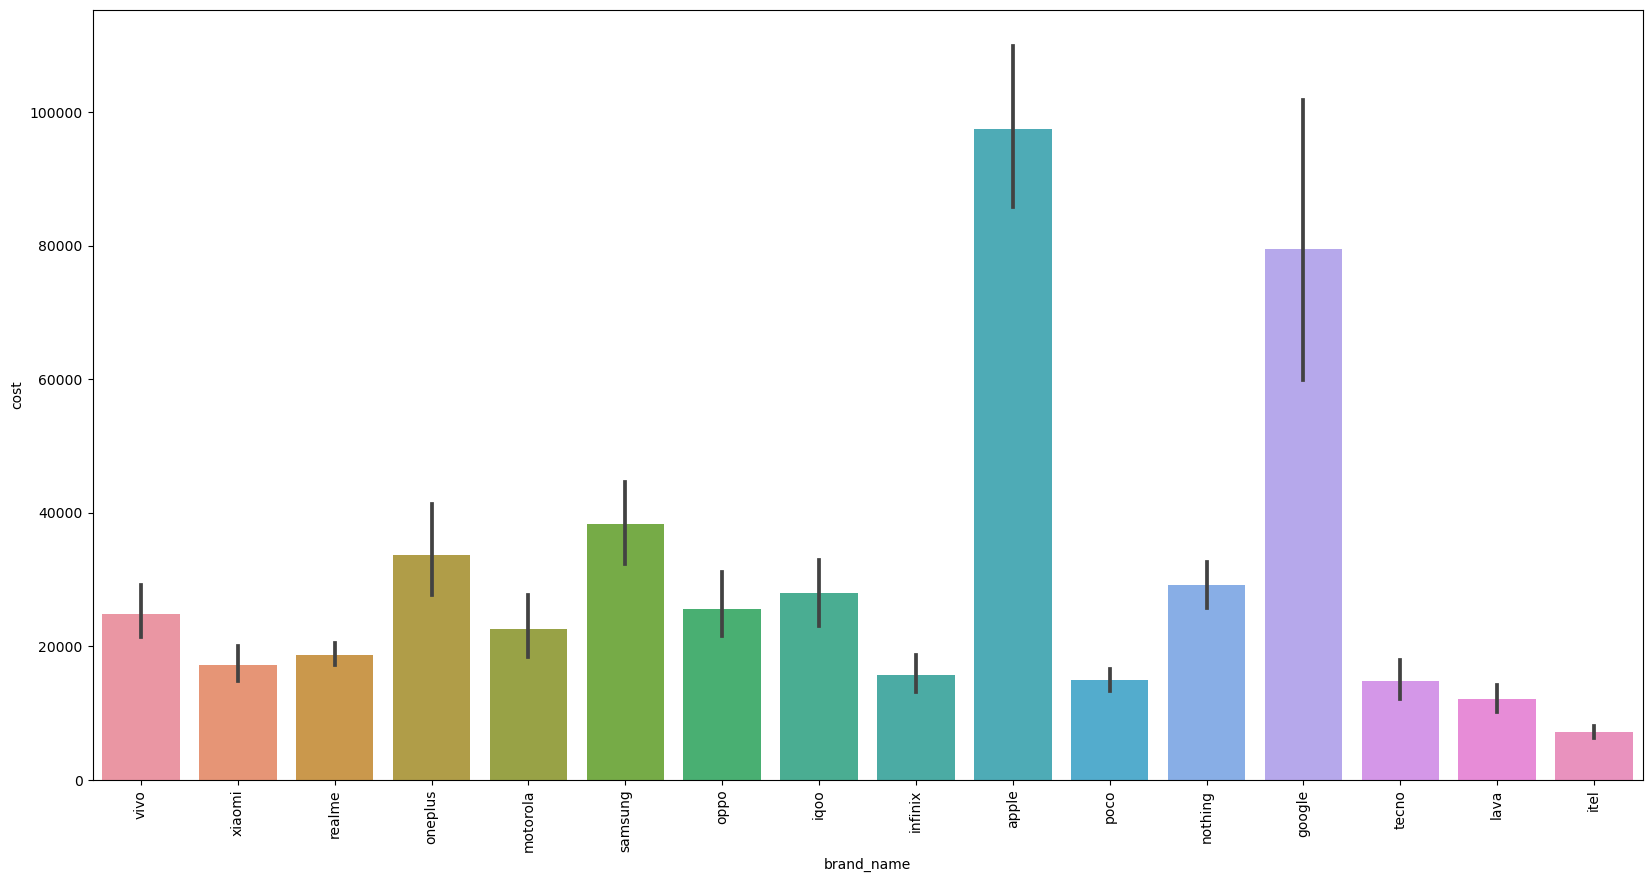

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(data=temp_df,x='brand_name',y='cost')
plt.xticks(rotation='vertical')

# As we can clearly see, as the spec_score of the respective phones increase, so does the cost of the phones

<AxesSubplot:xlabel='spec_score', ylabel='cost'>

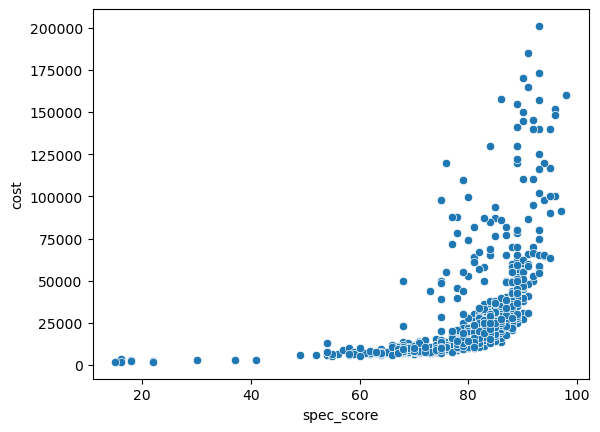

In [56]:
import seaborn as sns 
sns.scatterplot(data=anc1,x='spec_score',y='cost')

<AxesSubplot:xlabel='has_5g', ylabel='cost'>

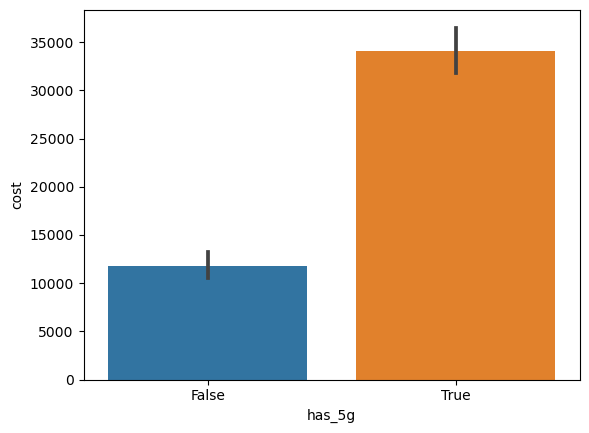

In [59]:
import seaborn as sns
sns.barplot(data=anc1,x='has_5g',y='cost')

# Estimator is used to calculate the overall mean, median of a numerical column with respect to a categorical column( with categorical column mostly along the x-axis).This proves that phones having 5g have much higher median price than the phones not having 5g

<AxesSubplot:xlabel='has_5g', ylabel='cost'>

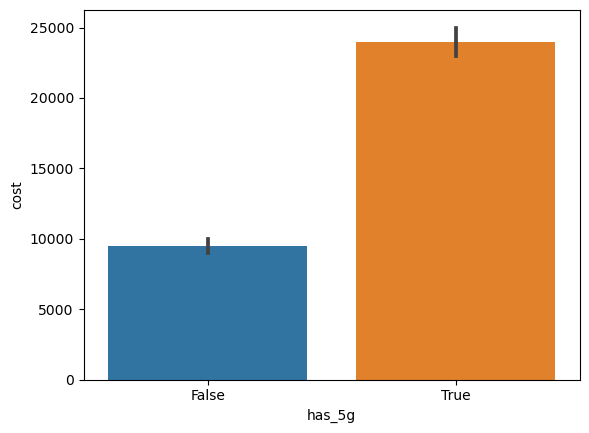

In [62]:
import seaborn as sns
import numpy as np
sns.barplot(data=anc1,x='has_5g',y='cost',estimator=np.median)

# The phones having nfc have a much higher cost than the phones who donot have nfc. Hence cost is directly propotional to existence/lack of existence of nfc

<AxesSubplot:xlabel='has_nfc', ylabel='cost'>

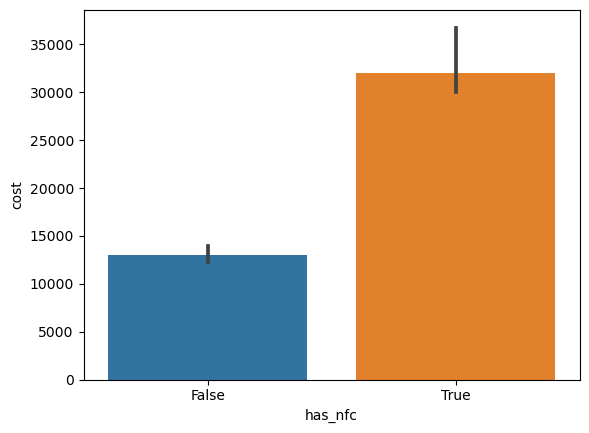

In [4]:
import seaborn as sns 
import numpy as np 
sns.barplot(data=anw,x='has_nfc',y='cost',estimator=np.median)

# From the below graph, we know that price isnot dependent on existence of irblaster in a phone, infact phones that donot have irblaster infact have a relatively higher median price compared to phones that do have irblaster

<AxesSubplot:xlabel='has_irblaster', ylabel='cost'>

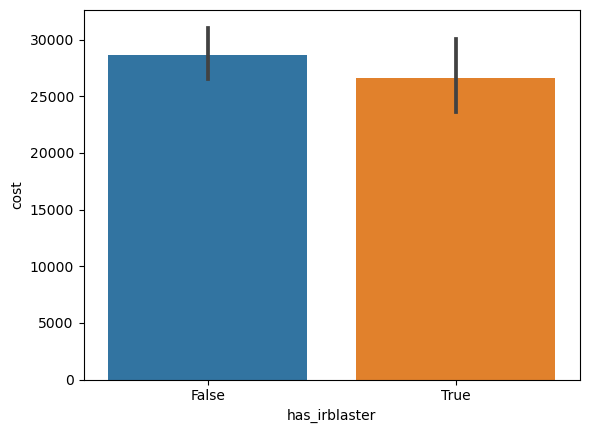

In [7]:
import seaborn as sns 
import numpy as np 
sns.barplot(data=anw,x='has_irblaster',y='cost')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'snapdragon'),
  Text(1, 0, 'dimensity'),
  Text(2, 0, 'exynos'),
  Text(3, 0, 'bionic'),
  Text(4, 0, 'helio'),
  Text(5, 0, 'tensor'),
  Text(6, 0, 'unisoc'),
  Text(7, 0, 'google'),
  Text(8, 0, 'a13'),
  Text(9, 0, 'apple'),
  Text(10, 0, 'qc8905'),
  Text(11, 0, 'dimensit'),
  Text(12, 0, 'tiger'),
  Text(13, 0, 'mediatek'),
  Text(14, 0, 'spreadtrum'),
  Text(15, 0, 'qualcomm')])

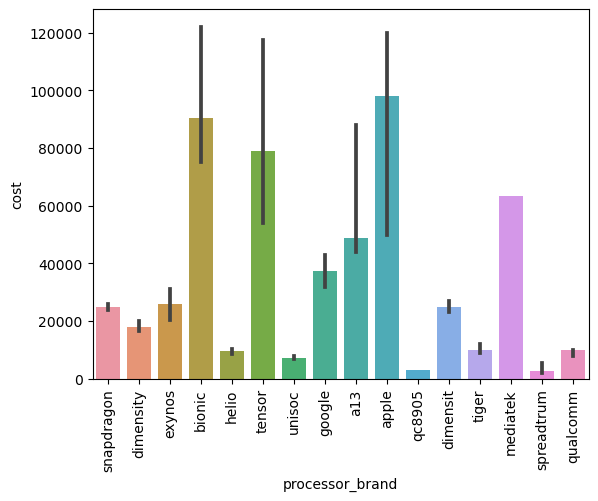

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
sns.barplot(data=anw,x='processor_brand',y='cost',estimator=np.median)
plt.xticks(rotation='vertical')

# phones using apple processors are the costliest followed by bionic,tensor, mediatek,a13 and google. All these processor brands are either from US or taiwan(above pic)

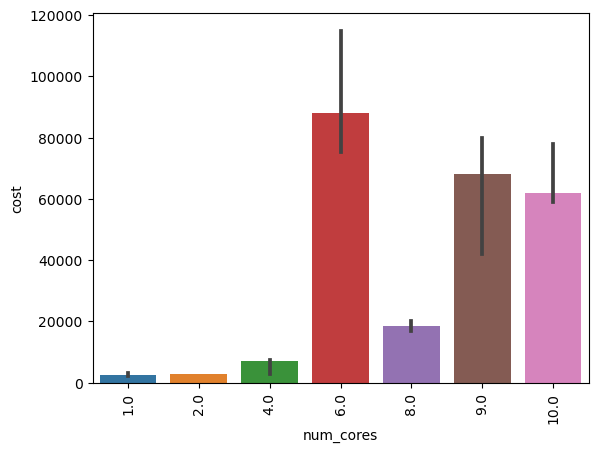

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.barplot(data=anw,x='num_cores',y='cost',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# The phones having num_cores=6 are the costliest, followed by 9 and 10....This is not really proportional meaning cost doesnot increase with increase in num cores.

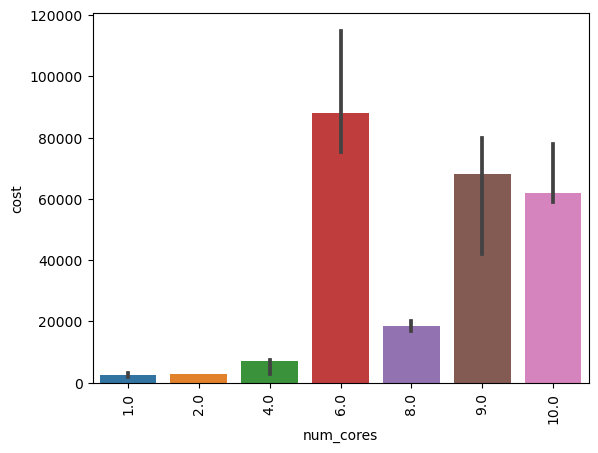

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
sns.barplot(data=anw,x='num_cores',y='cost',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show() 

# We conclude from this that phones having ios as software mostly use 6 cores and phones having android as os mostly has 8 core

In [4]:
import pandas as pd
pd.crosstab(anw['num_cores'],anw['android_version'])

android_version,android,ios,other
num_cores,,,
1.0,1,0,7
2.0,0,0,1
4.0,6,0,1
6.0,0,42,0
8.0,790,0,20
9.0,6,0,0
10.0,7,0,0


# The corr function below and scatter plot together proves a strong correlation between process_speed and cost of the phone

In [8]:
anw['processor_speed(GHz)'].corr(anw['cost'])

0.6746417780854053

<AxesSubplot:xlabel='processor_speed(GHz)', ylabel='cost'>

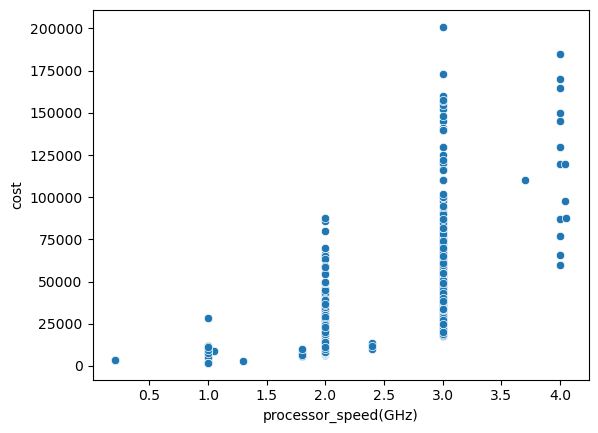

In [7]:
import seaborn as sns
sns.scatterplot(data=anw,x='processor_speed(GHz)',y='cost')

# screen size is only loosely proportional to cost

In [11]:
anw['screen_size(inches)'].corr(anw['cost'])

0.18765715992504492

<AxesSubplot:xlabel='screen_size(inches)', ylabel='cost'>

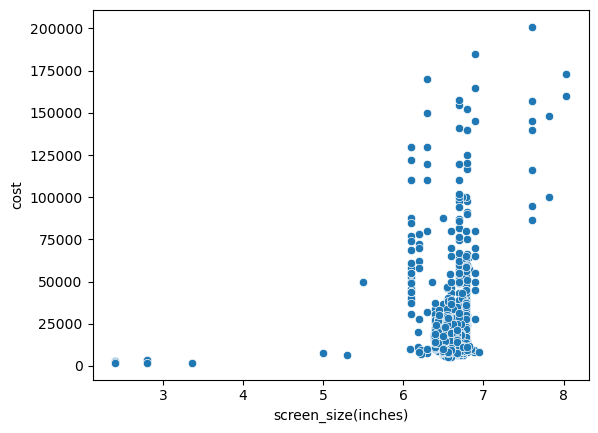

In [10]:
sns.scatterplot(data=anw,x='screen_size(inches)',y='cost')

# From the below function we conclude that processor_speed, internal capacity have a strong correlation with cost while spec score, has_nfc, ram capacity have a moderate corelation with cost. extended memry available too is moderately correlated with cost but in a negative manner.

In [12]:
anw.corr()['cost']

cost                         1.000000
spec_score                   0.489988
has_5g                       0.342648
has_nfc                      0.561520
has_irblaster               -0.028373
num_cores                   -0.123147
processor_speed(GHz)         0.674642
ram_capacity(GB)             0.495686
internal_capacity(GB)        0.709154
battery_capacity(mAh)       -0.024756
fast_charging(W)             0.281333
fast_charging_available     -0.248945
screen_size(inches)          0.187657
refresh_rate(Hz)             0.220860
rear_camera(MP)              0.239789
front_camera(MP)             0.325814
extended_memory_upto         0.154477
extended_memory_available   -0.509663
primary_camera_rear          0.138337
primary_camera_front         0.176258
Name: cost, dtype: float64

# has_5g, ram_capacity, screen size is strongly propotional to spec_score while has_nfc, num cores, processor speed, internal capacity, fast charging, refresh rate, rear camera, primary camera rear and primary camera front are moderately propotional to spec_score. extended memory available is moderately propotional to the spec score although it is negatively correlated.

In [14]:
anw.corr()['spec_score']

cost                         0.489988
spec_score                   1.000000
has_5g                       0.599731
has_nfc                      0.494575
has_irblaster                0.162781
num_cores                    0.544811
processor_speed(GHz)         0.574272
ram_capacity(GB)             0.754908
internal_capacity(GB)        0.548235
battery_capacity(mAh)        0.230593
fast_charging(W)             0.562659
fast_charging_available      0.321065
screen_size(inches)          0.673783
refresh_rate(Hz)             0.572570
rear_camera(MP)              0.526332
front_camera(MP)             0.180851
extended_memory_upto         0.308713
extended_memory_available   -0.425223
primary_camera_rear          0.471490
primary_camera_front         0.537895
Name: spec_score, dtype: float64

# phone brands related to taiwan are the costliest followed by american brands which is followed by british phone brands, korean phone brands  and finish phone brands. Indian phonebrands are the cheapest and chinese phone brands are just above indian phonebrands.

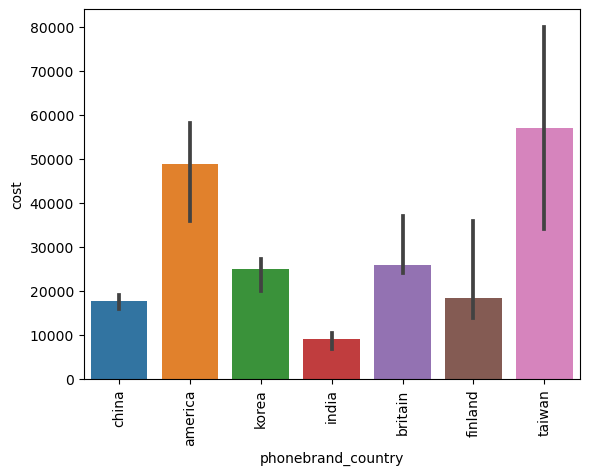

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
sns.barplot(data=anw,x='phonebrand_country',y='cost',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# phones that have processor brands of american origin are the costliest followed by phones having processors brands based in korea and taiwan. Phones having processor brand based in china are the cheapest. 

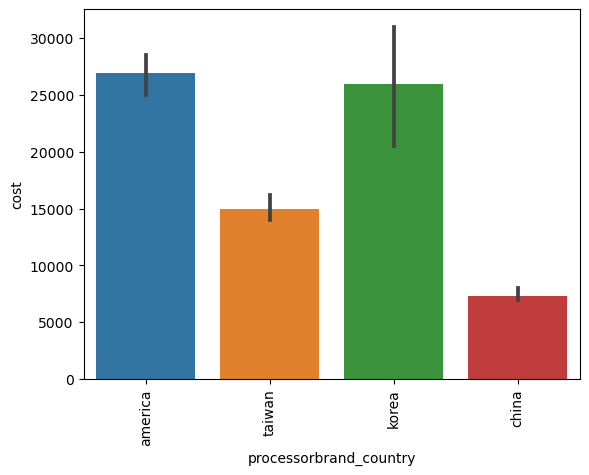

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
sns.barplot(data=anw,x='processorbrand_country',y='cost',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# Although spec_score almost seems to be the same irrespective of the place where the processor brands are based in, still when you look closely, you find that phones with processors based in korea are the highest rated followed by america,taiwan and spec_score of the phones whose processor brand is based in china is the lowest.

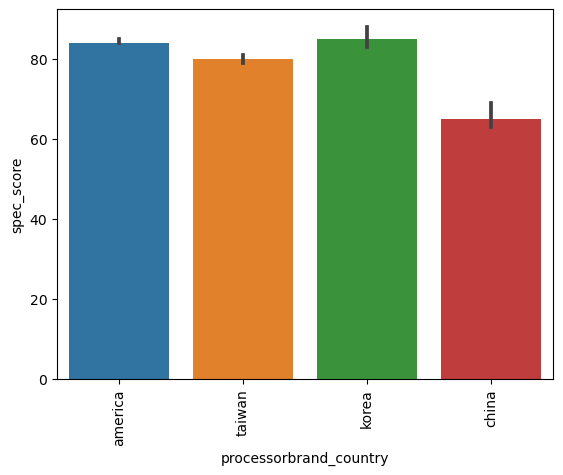

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
sns.barplot(data=anw,x='processorbrand_country',y='spec_score',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

# Although spec score seems to be the same almost but still if u look closely u find that phones of indian brand are the lowest rated, phones of taiwanese brands are the highest rated followed by british brands, korean brands, american brands, finnish brands and chinese brands 

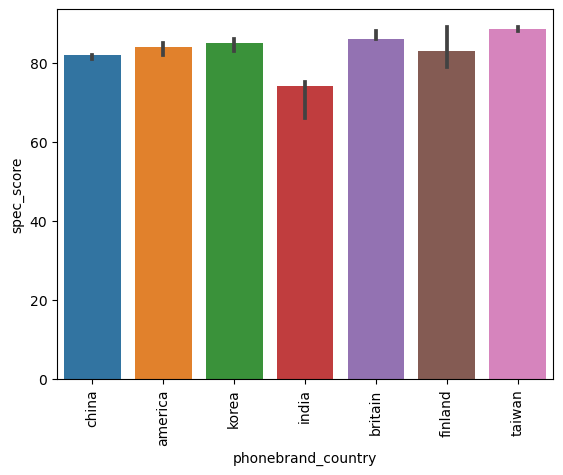

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
sns.barplot(data=anw,x='phonebrand_country',y='spec_score',estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Disp

In [13]:
import pandas as pd 
anw=pd.read_csv(r"D:/phonebrandCountryadded1.csv")
anw.head()

,brand_name,phone_name,cost,spec_score,has_5g,has_nfc,has_irblaster,processor_brand,num_cores,processor_speed(GHz),ram_capacity(GB),internal_capacity(GB),battery_capacity(mAh),fast_charging(W),fast_charging_available,screen_size(inches),resolution(px),refresh_rate(Hz),rear_camera(MP),front_camera(MP),android_version,extended_memory_upto,extended_memory_available,primary_camera_rear,primary_camera_front,phonebrand_country,processorbrand_country
0,vivo,Vivo Y300 5G,21999,83,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,80.0,1,6.67,1080 x 2400,120,2,1.0,android,2048.0,1,50.0,32.0,china,america
1,xiaomi,Xiaomi Redmi A4 5G,8499,70,True,False,False,snapdragon,8.0,2.0,4.0,64.0,5160,18.0,1,6.88,720 x 1640,120,2,1.0,android,1024.0,1,50.0,5.0,china,america
2,realme,Realme GT 7 Pro 5G,59999,90,True,True,True,snapdragon,8.0,4.0,12.0,256.0,5800,120.0,1,6.78,1264 x 2780,120,3,1.0,android,NaN,0,50.0,16.0,china,america
3,xiaomi,Xiaomi Redmi Note 13 Pro 5G,17724,83,True,False,True,snapdragon,8.0,2.0,8.0,128.0,5100,67.0,1,6.67,1220 x 2712,120,3,1.0,android,NaN,0,200.0,16.0,china,america
4,oneplus,OnePlus Nord CE 3 Lite 5G,14705,85,True,False,False,snapdragon,8.0,2.0,8.0,128.0,5000,67.0,1,6.72,1080 x 2400,120,3,1.0,android,1024.0,1,108.0,16.0,china,america
